# Proyecto: Sprint 9. Análisis de negocio

## Introducción 
Como parte de nuestras prácticas en el departamento de analítica de Showz, una empresa dedicada a la venta de entradas para eventos, nuestro objetivo principal será optimizar los gastos de marketing a través del análisis de datos. Este proyecto nos permitirá explorar y responder preguntas clave sobre el comportamiento y valor de los clientes para la compañía.

Contamos con información clave para desarrollar nuestro análisis, incluyendo:

Registros del servidor que detallan las visitas al sitio web de Showz desde enero de 2017 hasta diciembre de 2018.
Un archivo con los pedidos realizados durante este periodo.
Estadísticas relacionadas con los gastos de marketing.
Nuestro análisis se enfocará en investigar:

Cómo los clientes utilizan el servicio.
En qué momento comienzan a realizar compras.
Cuánto dinero aporta cada cliente a la compañía.
El momento en que los ingresos generados cubren el costo de adquisición de clientes.
Con estos resultados, buscamos aportar información valiosa para apoyar la toma de decisiones estratégicas y maximizar la rentabilidad del departamento de marketing.

## Librerías 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Datos

In [3]:
costs_data = pd.read_csv('/datasets/costs_us.csv')
orders_data = pd.read_csv('/datasets/orders_log_us.csv')
visits_data = pd.read_csv('/datasets/visits_log_us.csv')

## Exploración inicial

In [9]:
# Mostrar primeras filas de los datasets
display(costs_data.head(10))

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [8]:
# Mostrar info de los datos
print(visits_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [10]:
# Mostrar primeras filas de los datasets
display(orders_data.head(10))

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [5]:
# Mostrar info de los datos
print(orders_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [6]:
# Mostrar primeras filas de los datasets
display(visits_data.head(10))

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [7]:
# Mostrar info de los datos
print(visits_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


## Preprocesamiento

In [11]:
# Convertir los tipos de datos
costs_data['source_id'] = costs_data['source_id'].astype(str)  # Convertir 'source_id' a string
costs_data['dt'] = pd.to_datetime(costs_data['dt'])  # Convertir 'dt' a datetime

# Verificar los cambios
print(costs_data.dtypes)
print()
print(costs_data.head())

source_id            object
dt           datetime64[ns]
costs               float64
dtype: object

  source_id         dt  costs
0         1 2017-06-01  75.20
1         1 2017-06-02  62.25
2         1 2017-06-03  36.53
3         1 2017-06-04  55.00
4         1 2017-06-05  57.08


In [12]:
# Cambiar los nombres de las columnas a minúsculas
orders_data.columns = orders_data.columns.str.lower().str.replace(' ', '_')

# Convertir los tipos de datos
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'])  # Convertir 'buy_ts' a datetime
orders_data['uid'] = orders_data['uid'].astype(str)  # Convertir 'uid' a string

# Verificar los cambios
print(orders_data.dtypes)
print()
print(orders_data.head())

buy_ts     datetime64[ns]
revenue           float64
uid                object
dtype: object

               buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450


In [16]:
# Cambiar los nombres de las columnas a snake_case y minúsculas
visits_data.columns = visits_data.columns.str.lower().str.replace(' ', '_')

# Convertir los tipos de datos
visits_data['end_ts'] = pd.to_datetime(visits_data['end_ts'])  # Convertir 'end_ts' a datetime
visits_data['start_ts'] = pd.to_datetime(visits_data['start_ts'])  # Convertir 'start_ts' a datetime
visits_data['source_id'] = visits_data['source_id'].astype(str)  # Convertir 'source_id' a string
visits_data['uid'] = visits_data['uid'].astype(str)  # Convertir 'uid' a string

# Verificar los cambios
print(visits_data.dtypes)
print()
print(visits_data.head())


device               object
end_ts       datetime64[ns]
source_id            object
start_ts     datetime64[ns]
uid                  object
dtype: object

    device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [13]:
# Verificar duplicados en cada dataset
print(f"Duplicados en costs_data: {costs_data.duplicated().sum()}")
print(f"Duplicados en orders_data: {orders_data.duplicated().sum()}")
print(f"Duplicados en visits_data: {visits_data.duplicated().sum()}")

Duplicados en costs_data: 0
Duplicados en orders_data: 0
Duplicados en visits_data: 0


In [14]:
print("Valores nulos en costs_data:")
print(costs_data.isnull().sum(), "\n")

print("Valores nulos en orders_data:")
print(orders_data.isnull().sum(), "\n")

print("Valores nulos en visits_data:")
print(visits_data.isnull().sum(), "\n")

Valores nulos en costs_data:
source_id    0
dt           0
costs        0
dtype: int64 

Valores nulos en orders_data:
buy_ts     0
revenue    0
uid        0
dtype: int64 

Valores nulos en visits_data:
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64 



In [17]:
#Revisar rangos de fecha
print("Rango de fechas en costs_data:", costs_data['dt'].min(), "->", costs_data['dt'].max())
print("Rango de fechas en orders_data:", orders_data['buy_ts'].min(), "->", orders_data['buy_ts'].max())
print("Rango de fechas en visits_data:", visits_data['start_ts'].min(), "->", visits_data['end_ts'].max())

Rango de fechas en costs_data: 2017-06-01 00:00:00 -> 2018-05-31 00:00:00
Rango de fechas en orders_data: 2017-06-01 00:10:00 -> 2018-06-01 00:02:00
Rango de fechas en visits_data: 2017-06-01 00:01:00 -> 2018-06-01 01:26:00


### Resumen de cambios

 Cambios realizados en los datasets
1️⃣ Costs Data (costs_data)

✔ Columnas modificadas:

source_id: Convertido de int64 → str (para tratarlo como categoría).
dt: Convertido de object → datetime (para análisis temporal).

✔ Validaciones realizadas:

No se encontraron valores nulos.
No había registros duplicados.
El rango de fechas es 2017-06-01 → 2018-05-31.

2️⃣ Orders Data (orders_data)

✔ Columnas modificadas:

buy_ts: Convertido de object → datetime (para análisis de compras en el tiempo).
uid: Convertido de uint64 → str (para tratarlo como identificador único).
Columnas renombradas a snake_case: Buy Ts → buy_ts, Revenue → revenue, Uid → uid.

✔ Validaciones realizadas:

No se encontraron valores nulos.
No había registros duplicados.
El rango de fechas es 2017-06-01 → 2018-06-01.

3️⃣ Visits Data (visits_data)

✔ Columnas modificadas:

start_ts: Convertido de object → datetime (para identificar inicios de sesiones).
end_ts: Convertido de object → datetime (para identificar finalización de sesiones).
source_id: Convertido de int64 → str (para tratarlo como categoría).
uid: Convertido de uint64 → str (para tratarlo como identificador único).
Columnas renombradas a snake_case: End Ts → end_ts, Start Ts → start_ts, Source Id → source_id.

✔ Validaciones realizadas:

No se encontraron valores nulos.
No había registros duplicados.
El rango de fechas es 2017-06-01 → 2018-06-01.

## Análisis Exploratorio

### Visitas

In [18]:
# Crear la columna 'date' para facilitar análisis diarios
visits_data['date'] = visits_data['start_ts'].dt.date

#  ¿Cuántas personas lo usan cada día, semana y mes?
users_per_day = visits_data.groupby('date')['uid'].nunique()
users_per_week = visits_data.groupby(visits_data['start_ts'].dt.to_period('W'))['uid'].nunique()
users_per_month = visits_data.groupby(visits_data['start_ts'].dt.to_period('M'))['uid'].nunique()

print("Usuarios únicos por día:")
print(users_per_day.head(), "\n")

print("Usuarios únicos por semana:")
print(users_per_week.head(), "\n")

print("Usuarios únicos por mes:")
print(users_per_month.head(), "\n")

#  ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)
sessions_per_day = visits_data.groupby('date')['uid'].count()

print("Sesiones por día:")
print(sessions_per_day.head(), "\n")

#  ¿Cuál es la duración de cada sesión?
visits_data['session_duration'] = (visits_data['end_ts'] - visits_data['start_ts']).dt.total_seconds() / 60  # en minutos
avg_session_duration = visits_data.groupby('date')['session_duration'].mean()

print("Duración promedio de sesión por día (en minutos):")
print(avg_session_duration.head(), "\n")

#  ¿Con qué frecuencia los usuarios regresan?
first_visit = visits_data.groupby('uid')['start_ts'].min()
returning_users = visits_data[visits_data['uid'].isin(first_visit.index[first_visit.duplicated()])]
returning_users_per_day = returning_users.groupby(returning_users['start_ts'].dt.date)['uid'].nunique()

print("Usuarios que regresan por día:")
print(returning_users_per_day.head(), "\n")



Usuarios únicos por día:
date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: uid, dtype: int64 

Usuarios únicos por semana:
start_ts
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
Freq: W-SUN, Name: uid, dtype: int64 

Usuarios únicos por mes:
start_ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: uid, dtype: int64 

Sesiones por día:
date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: uid, dtype: int64 

Duración promedio de sesión por día (en minutos):
date
2017-06-01    11.105346
2017-06-02    10.330674
2017-06-03    10.115968
2017-06-04     9.238497
2017-06-05    10.407503
Name: session_duration, dtype: float64 

Usuarios que regresan por día:
start_ts
2017-06-01    142
2017-06-02    131
2017-06-03     78
2017-06-04     81
2017-06

In [19]:
# Asegurarse de que los datos estén disponibles
costs_data['dt'] = pd.to_datetime(costs_data['dt'])
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'])
visits_data['start_ts'] = pd.to_datetime(visits_data['start_ts'])
visits_data['end_ts'] = pd.to_datetime(visits_data['end_ts'])

# Calcular el rango de fechas para cada fuente
date_ranges = {
    'Costs Data': (costs_data['dt'].min(), costs_data['dt'].max()),
    'Orders Data': (orders_data['buy_ts'].min(), orders_data['buy_ts'].max()),
    'Visits Data': (visits_data['start_ts'].min(), visits_data['end_ts'].max())
}


In [20]:
# Crear la columna 'date' para facilitar análisis diarios
visits_data['date'] = visits_data['start_ts'].dt.date

# 1. Usuarios únicos por día, semana y mes
users_per_day = visits_data.groupby('date')['uid'].nunique()
users_per_week = visits_data.groupby(visits_data['start_ts'].dt.to_period('W'))['uid'].nunique()
users_per_month = visits_data.groupby(visits_data['start_ts'].dt.to_period('M'))['uid'].nunique()

# 2. Sesiones por día
sessions_per_day = visits_data.groupby('date')['uid'].count()

# 3. Duración promedio de sesión por día
visits_data['session_duration'] = (visits_data['end_ts'] - visits_data['start_ts']).dt.total_seconds() / 60  # en minutos
avg_session_duration = visits_data.groupby('date')['session_duration'].mean()

# 4. Usuarios que regresan por día
first_visit = visits_data.groupby('uid')['start_ts'].min()
returning_users = visits_data[visits_data['uid'].isin(first_visit.index[first_visit.duplicated()])]
returning_users_per_day = returning_users.groupby(returning_users['start_ts'].dt.date)['uid'].nunique()


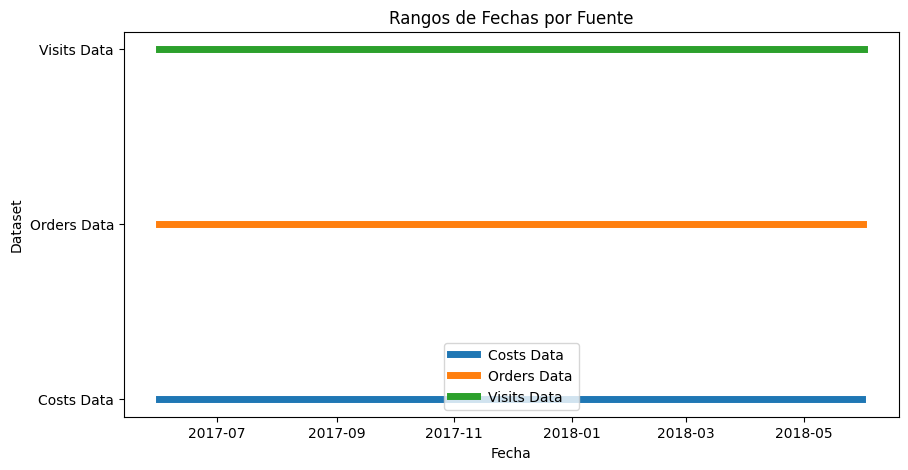

In [26]:
# 1. Rango de fechas por fuente (modificado para claridad)
plt.figure(figsize=(10, 5))
for dataset, (min_date, max_date) in date_ranges.items():
    plt.plot([min_date, max_date], [dataset, dataset], label=dataset, linewidth=5)
plt.title('Rangos de Fechas por Fuente')
plt.xlabel('Fecha')
plt.ylabel('Dataset')
plt.legend()
plt.show()


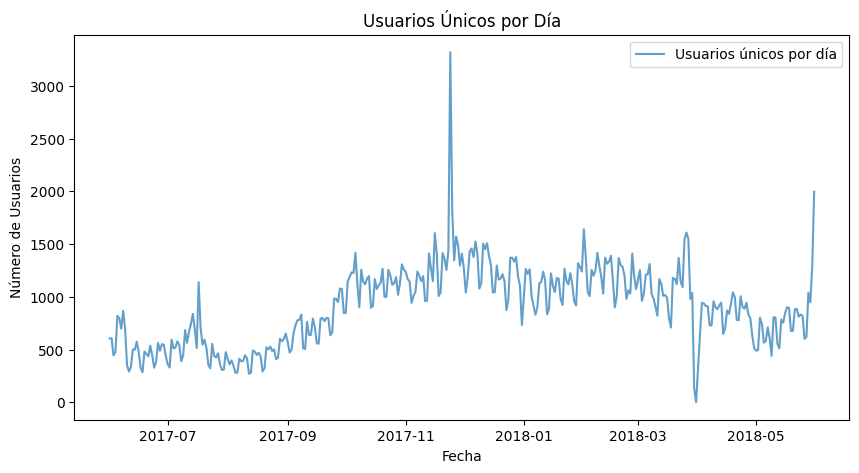

In [21]:
# 2. Usuarios únicos por día, semana y mes
plt.figure(figsize=(10, 5))
users_per_day.plot(kind='line', label='Usuarios únicos por día', alpha=0.7)
plt.title('Usuarios Únicos por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Usuarios')
plt.legend()
plt.show()

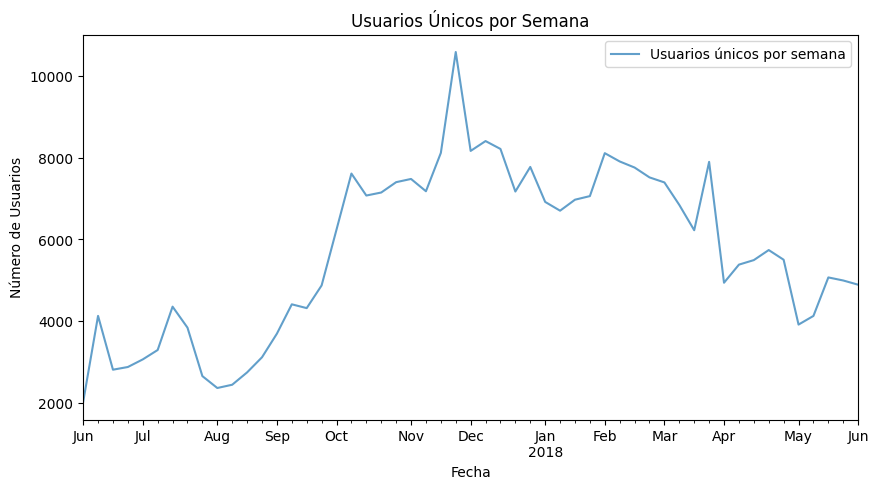

In [22]:
plt.figure(figsize=(10, 5))
users_per_week.plot(kind='line', label='Usuarios únicos por semana', alpha=0.7)
plt.title('Usuarios Únicos por Semana')
plt.xlabel('Fecha')
plt.ylabel('Número de Usuarios')
plt.legend()
plt.show()

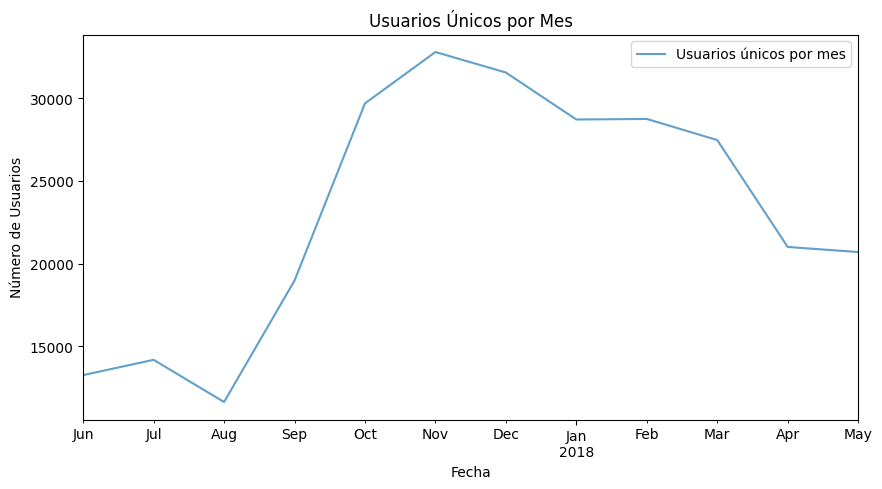

In [23]:
plt.figure(figsize=(10, 5))
users_per_month.plot(kind='line', label='Usuarios únicos por mes', alpha=0.7)
plt.title('Usuarios Únicos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Número de Usuarios')
plt.legend()
plt.show()

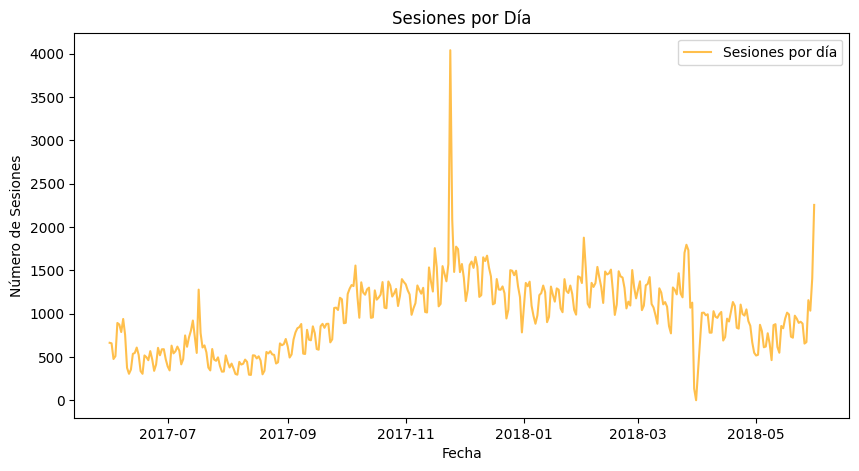

In [24]:
# 3. Sesiones por día
plt.figure(figsize=(10, 5))
sessions_per_day.plot(kind='line', label='Sesiones por día', color='orange', alpha=0.7)
plt.title('Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.legend()
plt.show()

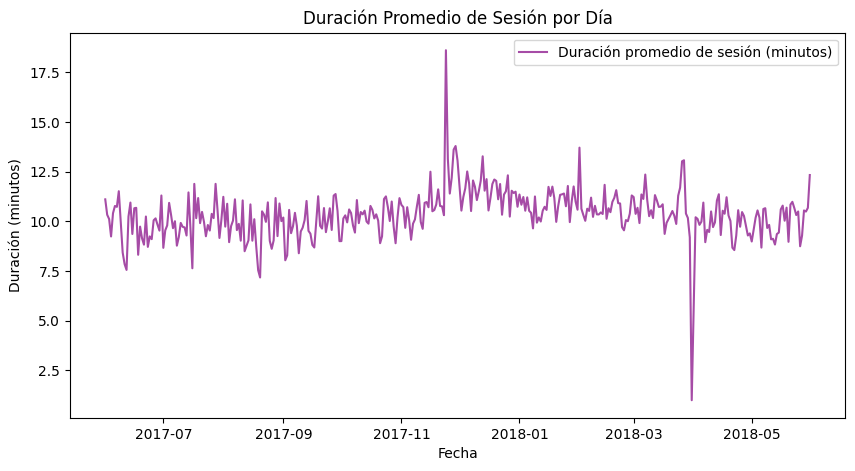

In [25]:
# 4. Duración promedio de sesión por día
plt.figure(figsize=(10, 5))
avg_session_duration.plot(kind='line', label='Duración promedio de sesión (minutos)', color='purple', alpha=0.7)
plt.title('Duración Promedio de Sesión por Día')
plt.xlabel('Fecha')
plt.ylabel('Duración (minutos)')
plt.legend()
plt.show()

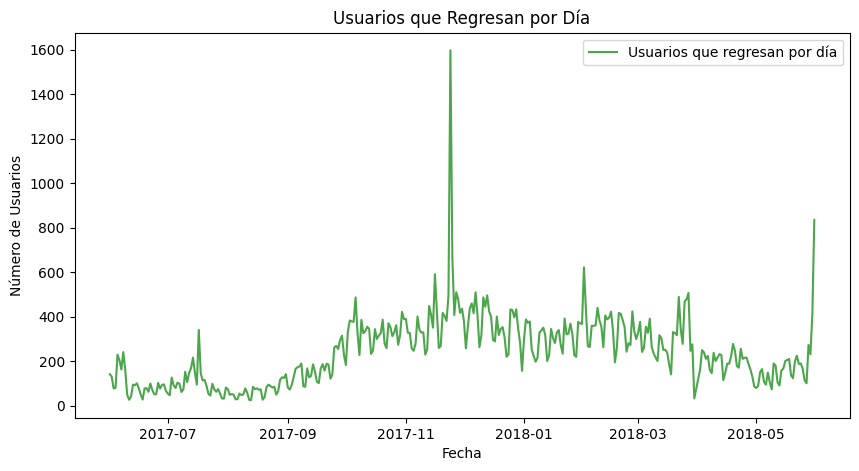

In [27]:
# 5. Usuarios que regresan por día
plt.figure(figsize=(10, 5))
returning_users_per_day.plot(kind='line', label='Usuarios que regresan por día', color='green', alpha=0.7)
plt.title('Usuarios que Regresan por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Usuarios')
plt.legend()
plt.show()

In [28]:
# Promedio de usuarios únicos por día, semana y mes
avg_users_per_day = users_per_day.mean()
avg_users_per_week = users_per_week.mean()
avg_users_per_month = users_per_month.mean()

# Promedio de sesiones por día
avg_sessions_per_day = sessions_per_day.mean()

# Promedio de duración de sesión en minutos
avg_session_time = avg_session_duration.mean()

# Promedio de usuarios que regresan por día
avg_returning_users_per_day = returning_users_per_day.mean()

# Imprimir los promedios
print(f" Promedio de usuarios únicos por día: {avg_users_per_day:.2f}")
print(f" Promedio de usuarios únicos por semana: {avg_users_per_week:.2f}")
print(f" Promedio de usuarios únicos por mes: {avg_users_per_month:.2f}")
print(f" Promedio de sesiones por día: {avg_sessions_per_day:.2f}")
print(f" Promedio de duración de sesión: {avg_session_time:.2f} minutos")
print(f" Promedio de usuarios que regresan por día: {avg_returning_users_per_day:.2f}")


 Promedio de usuarios únicos por día: 907.99
 Promedio de usuarios únicos por semana: 5716.25
 Promedio de usuarios únicos por mes: 23228.42
 Promedio de sesiones por día: 987.36
 Promedio de duración de sesión: 10.36 minutos
 Promedio de usuarios que regresan por día: 240.66


In [29]:
# Filtrar usuarios recurrentes en el dataset de visitas
returning_sessions = visits_data[visits_data['uid'].isin(returning_users['uid'])]

# Contar cuántas sesiones fueron de usuarios recurrentes por día
returning_sessions_per_day = returning_sessions.groupby(returning_sessions['start_ts'].dt.date)['uid'].count()

# Calcular el promedio diario de sesiones de usuarios recurrentes
avg_returning_sessions_per_day = returning_sessions_per_day.mean()

# Imprimir el resultado
print(f"Promedio de sesiones diarias de usuarios recurrentes: {avg_returning_sessions_per_day:.2f}")


Promedio de sesiones diarias de usuarios recurrentes: 262.05


Resumen de Observaciones del Análisis de Visitas

1️⃣ Usuarios únicos por día, semana y mes

En promedio, 907.99 usuarios distintos visitan el sitio cada día.
5,716.25 usuarios únicos lo hacen semanalmente.
23,228.42 usuarios únicos visitan el sitio cada mes.
Conclusión: La cantidad de usuarios crece de forma esperada en periodos más amplios, indicando un flujo constante de nuevos visitantes.

2️⃣ Número de sesiones por día

En promedio, se registran 987.36 sesiones diarias.
Esto significa que algunos usuarios visitan el sitio más de una vez al día.

3️⃣ Duración promedio de las sesiones

El tiempo promedio de cada sesión es de 10.36 minutos.
Conclusión: Es un tiempo razonable para una plataforma de venta de boletos, lo que indica que los usuarios están explorando eventos o realizando compras.

4️⃣ Usuarios recurrentes

En promedio, 240.66 usuarios que ya habían visitado la plataforma anteriormente regresan cada día.
Esto representa aproximadamente el 26.5% de los usuarios diarios.
Conclusión: Un buen porcentaje de usuarios vuelve, lo que indica un cierto nivel de retención y fidelidad.

5️⃣ Sesiones de usuarios recurrentes

Aunque 240.66 usuarios regresan por día, en total generan 262.05 sesiones diarias.
Esto implica que algunos de ellos entran más de una vez al día.
Conclusión: Los usuarios recurrentes representan una parte importante del tráfico y tienen mayor engagement.

🔹 Conclusiones Generales
El sitio tiene una base de usuarios estable, con casi 1,000 sesiones diarias y 23,000 usuarios únicos al mes.
La retención de usuarios es positiva (más del 26% de los usuarios diarios son recurrentes).
Los usuarios recurrentes generan más sesiones, lo que sugiere que están más comprometidos con la plataforma.
El tiempo de sesión (10.36 min) es adecuado para una plataforma de venta de boletos, pero podríamos analizar si hay oportunidades para aumentar la interacción o mejorar la efiiciencia en las compras.

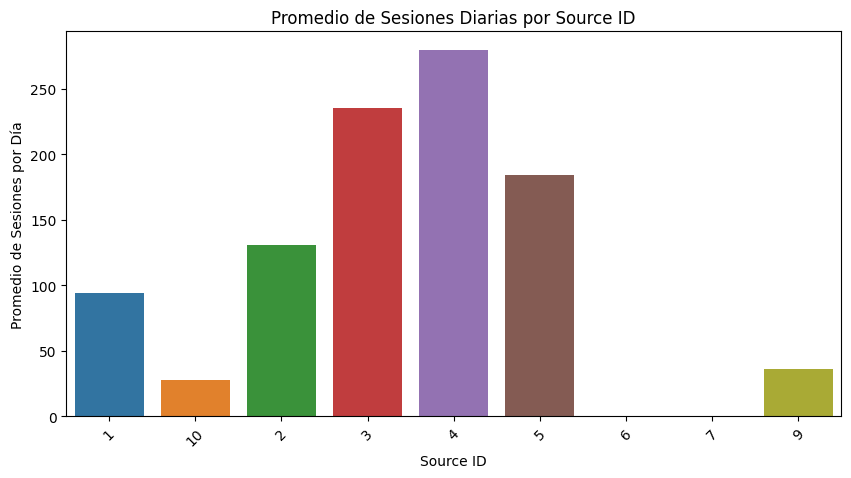

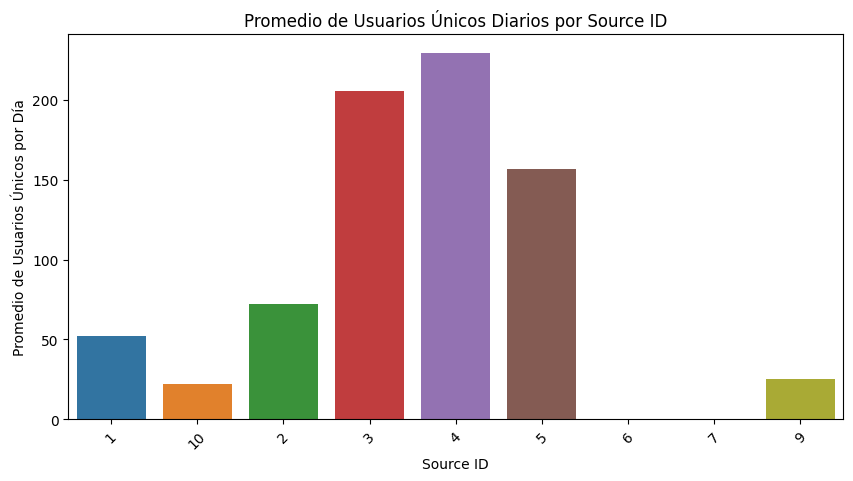

Promedio de sesiones diarias por Source ID:
source_id
1      93.739011
10     27.541209
2     130.840659
3     235.192308
4     279.653846
5     183.804945
6       0.016484
7       0.098901
9      36.475275
Name: uid, dtype: float64 

Promedio de usuarios únicos diarios por Source ID:
source_id
1      52.195055
10     22.162088
2      72.101648
3     205.373626
4     229.464286
5     156.521978
6       0.016484
7       0.093407
9      25.450549
Name: uid, dtype: float64


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Número promedio de sesiones por source_id
avg_sessions_by_source = visits_data.groupby('source_id')['uid'].count() / visits_data['date'].nunique()

# Número promedio de usuarios únicos por source_id
avg_users_by_source = visits_data.groupby('source_id')['uid'].nunique() / visits_data['date'].nunique()

# Gráfico: Número promedio de sesiones por source_id
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_sessions_by_source.index, y=avg_sessions_by_source.values)
plt.xlabel("Source ID")
plt.ylabel("Promedio de Sesiones por Día")
plt.title("Promedio de Sesiones Diarias por Source ID")
plt.xticks(rotation=45)
plt.show()

# Gráfico: Número promedio de usuarios únicos por source_id
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_users_by_source.index, y=avg_users_by_source.values)
plt.xlabel("Source ID")
plt.ylabel("Promedio de Usuarios Únicos por Día")
plt.title("Promedio de Usuarios Únicos Diarios por Source ID")
plt.xticks(rotation=45)
plt.show()

# Imprimir resultados
print("Promedio de sesiones diarias por Source ID:")
print(avg_sessions_by_source, "\n")

print("Promedio de usuarios únicos diarios por Source ID:")
print(avg_users_by_source)


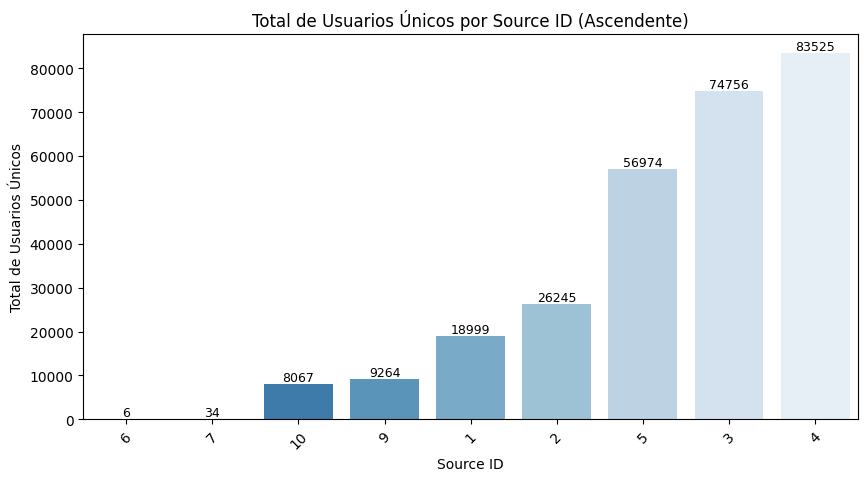

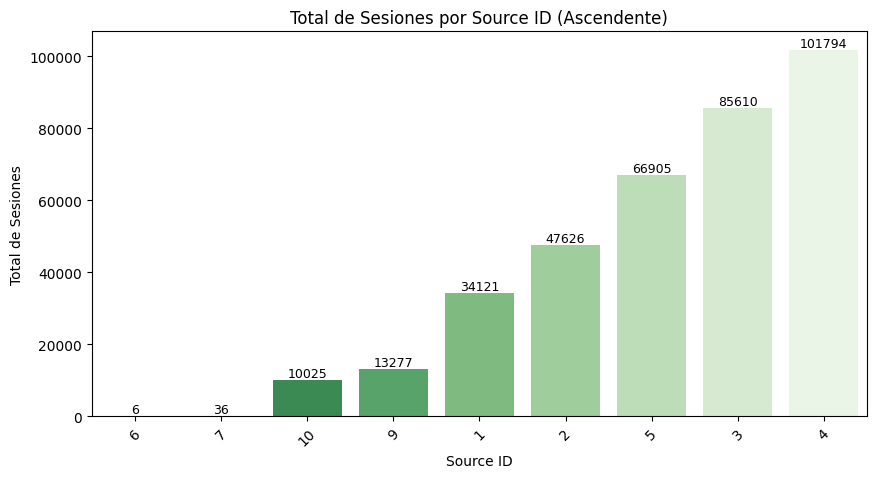

In [31]:
# Total de usuarios únicos por source_id
total_users_by_source = visits_data.groupby('source_id')['uid'].nunique()

# Total de sesiones por source_id
total_sessions_by_source = visits_data.groupby('source_id')['uid'].count()

# Ordenar total de usuarios únicos por source_id de forma ascendente
total_users_by_source_sorted = total_users_by_source.sort_values()

# Ordenar total de sesiones por source_id de forma ascendente
total_sessions_by_source_sorted = total_sessions_by_source.sort_values()

# Gráfico: Total de usuarios únicos por source_id (ordenado por valores)
plt.figure(figsize=(10, 5))
bars = sns.barplot(x=total_users_by_source_sorted.index.astype(str), y=total_users_by_source_sorted.values, palette="Blues_r")
plt.xlabel("Source ID")
plt.ylabel("Total de Usuarios Únicos")
plt.title("Total de Usuarios Únicos por Source ID (Ascendente)")
plt.xticks(rotation=45)

# Agregar etiquetas de datos
for bar, value in zip(bars.patches, total_users_by_source_sorted.values):
    bars.annotate(f'{int(value)}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=9)

plt.show()

# Gráfico: Total de sesiones por source_id (ordenado por valores)
plt.figure(figsize=(10, 5))
bars = sns.barplot(x=total_sessions_by_source_sorted.index.astype(str), y=total_sessions_by_source_sorted.values, palette="Greens_r")
plt.xlabel("Source ID")
plt.ylabel("Total de Sesiones")
plt.title("Total de Sesiones por Source ID (Ascendente)")
plt.xticks(rotation=45)

# Agregar etiquetas de datos
for bar, value in zip(bars.patches, total_sessions_by_source_sorted.values):
    bars.annotate(f'{int(value)}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=9)

plt.show()



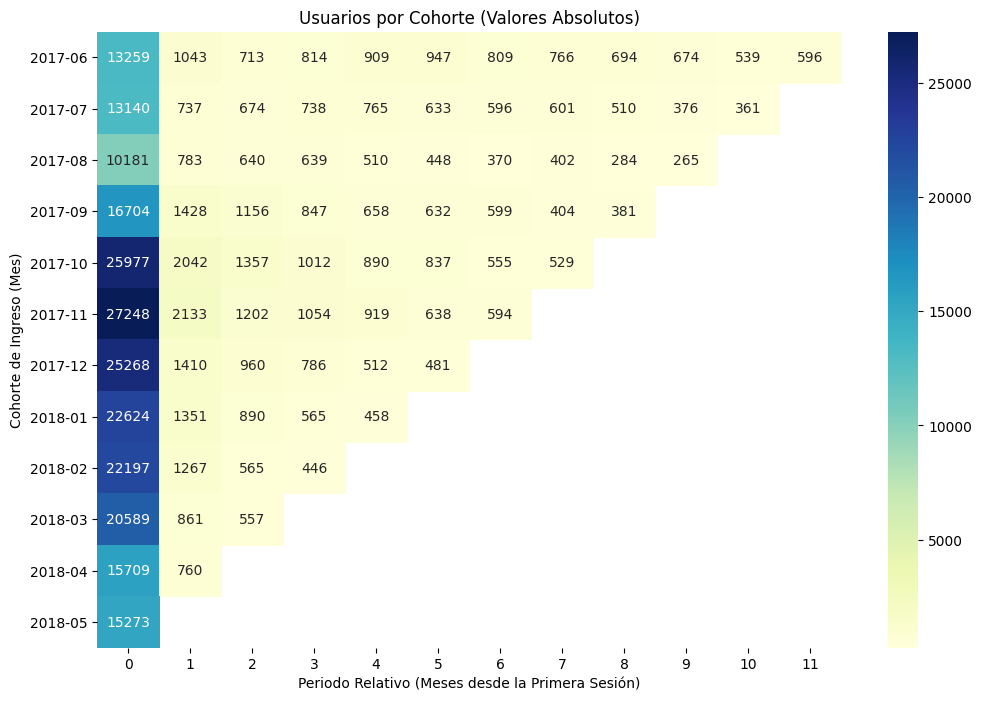

Tabla de Cohortes (valores absolutos):
cohort_period       0       1       2       3      4      5      6      7   \
cohort                                                                       
2017-06        13259.0  1043.0   713.0   814.0  909.0  947.0  809.0  766.0   
2017-07        13140.0   737.0   674.0   738.0  765.0  633.0  596.0  601.0   
2017-08        10181.0   783.0   640.0   639.0  510.0  448.0  370.0  402.0   
2017-09        16704.0  1428.0  1156.0   847.0  658.0  632.0  599.0  404.0   
2017-10        25977.0  2042.0  1357.0  1012.0  890.0  837.0  555.0  529.0   
2017-11        27248.0  2133.0  1202.0  1054.0  919.0  638.0  594.0    NaN   
2017-12        25268.0  1410.0   960.0   786.0  512.0  481.0    NaN    NaN   
2018-01        22624.0  1351.0   890.0   565.0  458.0    NaN    NaN    NaN   
2018-02        22197.0  1267.0   565.0   446.0    NaN    NaN    NaN    NaN   
2018-03        20589.0   861.0   557.0     NaN    NaN    NaN    NaN    NaN   
2018-04        15709.0   

In [32]:
# Identificar la primera fecha de sesión por usuario
visits_data['first_session_date'] = visits_data.groupby('uid')['start_ts'].transform('min')

# Crear una columna de cohorte basada en el mes de la primera sesión
visits_data['cohort'] = visits_data['first_session_date'].dt.to_period('M')

# Crear una columna para el mes relativo desde la cohorte de cada usuario
visits_data['cohort_period'] = (
    (visits_data['start_ts'].dt.to_period('M') - visits_data['cohort']).apply(lambda x: x.n)
)

# Crear una tabla dinámica de cohortes (valores absolutos de usuarios únicos)
cohort_table = visits_data.pivot_table(
    index='cohort',               # Cohorte de ingreso
    columns='cohort_period',      # Meses desde la primera sesión
    values='uid',                 # Contar usuarios únicos
    aggfunc='nunique'             # Contar usuarios únicos
)

# Generar un heatmap para visualizar los datos (valores absolutos)
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_table, annot=True, fmt="g", cmap="YlGnBu")
plt.title("Usuarios por Cohorte (Valores Absolutos)")
plt.xlabel("Periodo Relativo (Meses desde la Primera Sesión)")
plt.ylabel("Cohorte de Ingreso (Mes)")
plt.show()

# Imprimir la tabla (valores absolutos)
print("Tabla de Cohortes (valores absolutos):")
print(cohort_table)



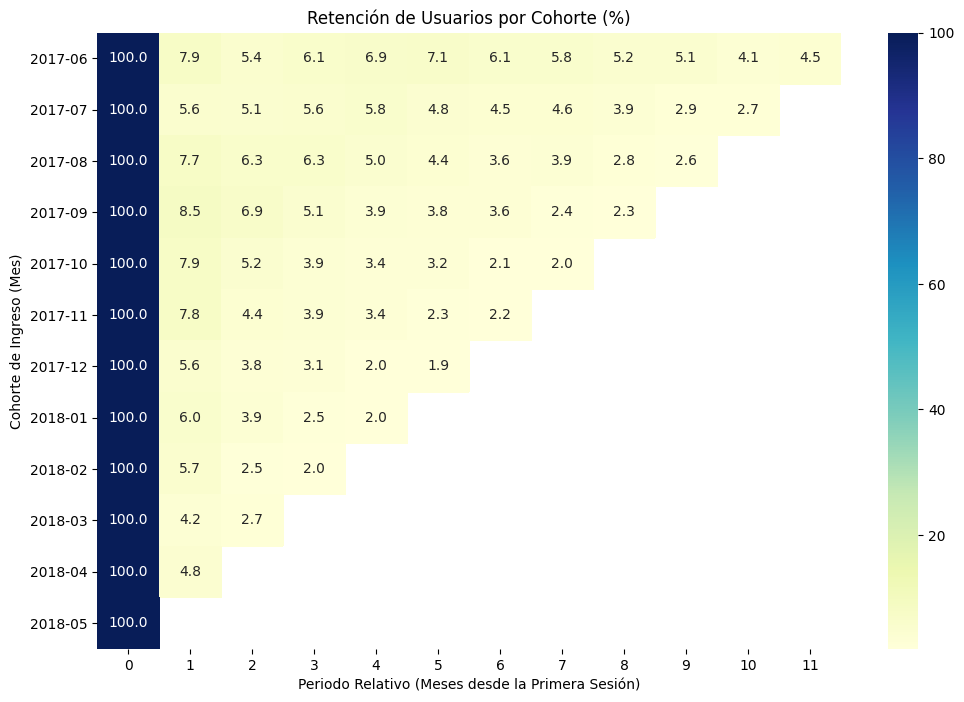

Tabla de Retención (porcentaje):
cohort_period     0         1         2         3         4         5   \
cohort                                                                   
2017-06        100.0  7.866355  5.377479  6.139226  6.855721  7.142318   
2017-07        100.0  5.608828  5.129376  5.616438  5.821918  4.817352   
2017-08        100.0  7.690797  6.286219  6.276397  5.009331  4.400354   
2017-09        100.0  8.548851  6.920498  5.070642  3.939176  3.783525   
2017-10        100.0  7.860800  5.223852  3.895754  3.426108  3.222081   
2017-11        100.0  7.828097  4.411333  3.868174  3.372725  2.341456   
2017-12        100.0  5.580180  3.799272  3.110654  2.026278  1.903593   
2018-01        100.0  5.971535  3.933876  2.497348  2.024399       NaN   
2018-02        100.0  5.707979  2.545389  2.009281       NaN       NaN   
2018-03        100.0  4.181845  2.705328       NaN       NaN       NaN   
2018-04        100.0  4.837991       NaN       NaN       NaN       NaN   
2018-

In [33]:
# Calcular la retención dividiendo cada columna por la primera columna (cohort_period = 0)
cohort_retention = cohort_table.div(cohort_table.iloc[:, 0], axis=0) * 100  # Convertir a porcentaje

# Generar un heatmap para visualizar la retención
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_retention, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Retención de Usuarios por Cohorte (%)")
plt.xlabel("Periodo Relativo (Meses desde la Primera Sesión)")
plt.ylabel("Cohorte de Ingreso (Mes)")
plt.show()

# Imprimir la tabla de retención
print("Tabla de Retención (porcentaje):")
print(cohort_retention)


con este análisis de cohorte podemos ver que: 
La naturaleza del negocio (venta de boletos)
Ciclo de compra único: En la industria de venta de boletos, los usuarios tienden a visitar el sitio, realizar la compra y no regresar hasta que tengan la necesidad de comprar boletos para otro evento. Esto puede explicar la alta actividad inicial y la baja retención en los meses siguientes.
Eventos puntuales: La actividad de los usuarios puede estar relacionada con eventos específicos. Si el evento ocurre en el mes en que se unieron, es probable que no vuelvan hasta el siguiente evento relevante para ellos.

Estadísticas de sesiones promedio por usuario por mes:
Promedio: 1.28
Mínimo: 1.23
Máximo: 1.34
Moda: 1.23

Estadísticas de sesiones promedio por usuario por día:
Promedio: 1.08
Mínimo: 1.00
Máximo: 1.22
Moda: 1.07



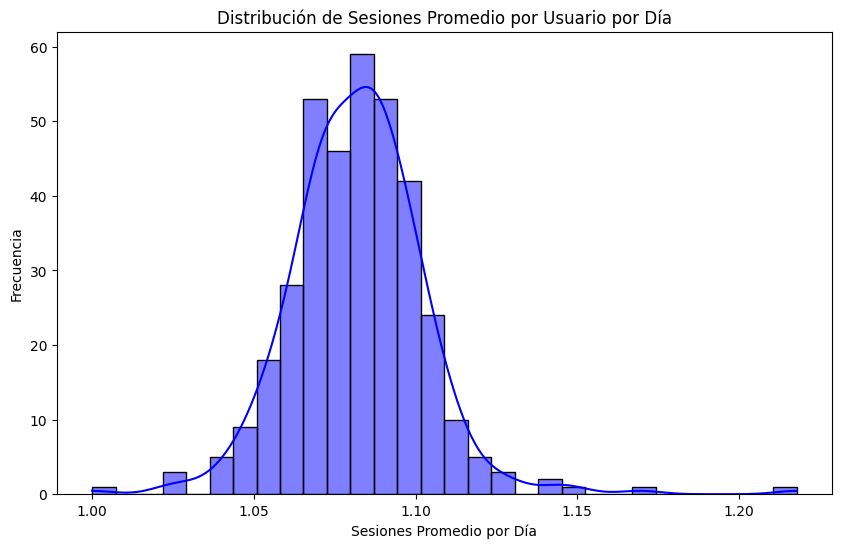

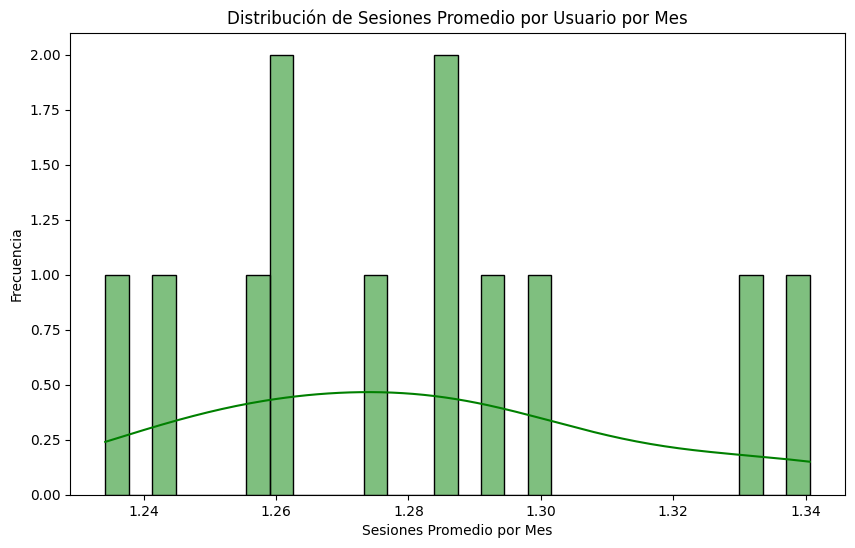

In [34]:
# Calcular sesiones promedio por usuario por mes
sessions_per_month = visits_data.groupby(visits_data['start_ts'].dt.to_period('M'))['uid'].count()
users_per_month = visits_data.groupby(visits_data['start_ts'].dt.to_period('M'))['uid'].nunique()
sessions_per_user_month = sessions_per_month / users_per_month

# Calcular sesiones promedio por usuario por día
sessions_per_day = visits_data.groupby(visits_data['start_ts'].dt.date)['uid'].count()
users_per_day = visits_data.groupby(visits_data['start_ts'].dt.date)['uid'].nunique()
sessions_per_user_day = sessions_per_day / users_per_day

# Estadísticas de sesiones promedio por usuario por mes
monthly_avg = sessions_per_user_month.mean()
monthly_min = sessions_per_user_month.min()
monthly_max = sessions_per_user_month.max()
monthly_mode = sessions_per_user_month.mode()[0]  # Primera moda en caso de múltiples

print(f"Estadísticas de sesiones promedio por usuario por mes:")
print(f"Promedio: {monthly_avg:.2f}")
print(f"Mínimo: {monthly_min:.2f}")
print(f"Máximo: {monthly_max:.2f}")
print(f"Moda: {monthly_mode:.2f}\n")

# Estadísticas de sesiones promedio por usuario por día
daily_avg = sessions_per_user_day.mean()
daily_min = sessions_per_user_day.min()
daily_max = sessions_per_user_day.max()
daily_mode = sessions_per_user_day.mode()[0]  # Primera moda en caso de múltiples

print(f"Estadísticas de sesiones promedio por usuario por día:")
print(f"Promedio: {daily_avg:.2f}")
print(f"Mínimo: {daily_min:.2f}")
print(f"Máximo: {daily_max:.2f}")
print(f"Moda: {daily_mode:.2f}\n")

# Visualización de sesiones promedio por usuario por día (opcional)
plt.figure(figsize=(10, 6))
sns.histplot(sessions_per_user_day, kde=True, bins=30, color="blue")
plt.title("Distribución de Sesiones Promedio por Usuario por Día")
plt.xlabel("Sesiones Promedio por Día")
plt.ylabel("Frecuencia")
plt.show()

# Visualización de sesiones promedio por usuario por mes (opcional)
plt.figure(figsize=(10, 6))
sns.histplot(sessions_per_user_month, kde=True, bins=30, color="green")
plt.title("Distribución de Sesiones Promedio por Usuario por Mes")
plt.xlabel("Sesiones Promedio por Mes")
plt.ylabel("Frecuencia")
plt.show()


Observaciones del Análisis de Sesiones Promedio

Sesiones promedio por usuario por día

Distribución ajustada: El histograma muestra que la mayoría de los usuarios tienen un promedio de entre 1.05 y 1.10 sesiones por día.
Confirmación del comportamiento: Esto indica que los usuarios rara vez regresan más de una vez al día después de su sesión inicial, lo que confirma un patrón de uso donde solo visitan el sitio para completar su compra.

Sesiones promedio por usuario por mes

Distribución dispersa: El promedio mensual está entre 1.25 y 1.34 sesiones por usuario, mostrando que los usuarios generalmente no vuelven durante el mismo mes después de la sesión de compra inicial.
Confirmación del comportamiento mensual: Los valores bajos refuerzan la idea de que la plataforma de venta de boletos tiene un uso basado en eventos puntuales, y no fomenta la interacción recurrente dentro del mismo mes.

Duración promedio de las sesiones (ASL general): 10.72 minutos
Estadísticas del ASL por usuario:
   Promedio: 8.79 minutos
   Mínimo: 0.00 minutos
   Máximo: 349.00 minutos
   Moda: 1.00 minutos


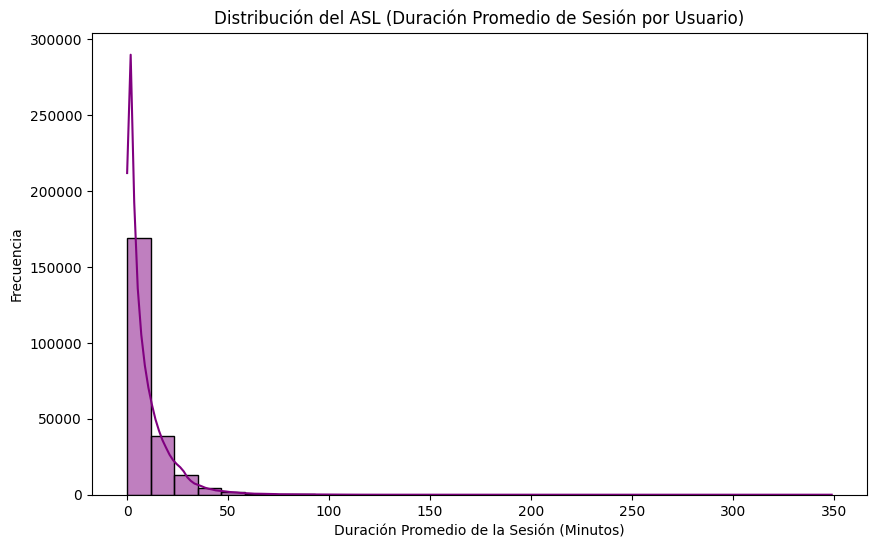

In [35]:
# Calcular la duración de cada sesión en minutos
visits_data['session_duration'] = (visits_data['end_ts'] - visits_data['start_ts']).dt.total_seconds() / 60

# Calcular el ASL (Average Session Length) general
asl_general = visits_data['session_duration'].mean()

# Calcular el ASL por usuario
asl_per_user = visits_data.groupby('uid')['session_duration'].mean()

# Estadísticas del ASL por usuario
asl_user_avg = asl_per_user.mean()
asl_user_min = asl_per_user.min()
asl_user_max = asl_per_user.max()
asl_user_mode = asl_per_user.mode()[0]

# Imprimir resultados
print(f"Duración promedio de las sesiones (ASL general): {asl_general:.2f} minutos")
print(f"Estadísticas del ASL por usuario:")
print(f"   Promedio: {asl_user_avg:.2f} minutos")
print(f"   Mínimo: {asl_user_min:.2f} minutos")
print(f"   Máximo: {asl_user_max:.2f} minutos")
print(f"   Moda: {asl_user_mode:.2f} minutos")

# Visualización opcional: Distribución del ASL por usuario
plt.figure(figsize=(10, 6))
sns.histplot(asl_per_user, kde=True, bins=30, color="purple")
plt.title("Distribución del ASL (Duración Promedio de Sesión por Usuario)")
plt.xlabel("Duración Promedio de la Sesión (Minutos)")
plt.ylabel("Frecuencia")
plt.show()


In [36]:
# Calcular la duración de cada sesión en minutos (si no está calculado previamente)
if 'session_duration' not in visits_data.columns:
    visits_data['session_duration'] = (visits_data['end_ts'] - visits_data['start_ts']).dt.total_seconds() / 60

# Categorías de duración de sesión
duration_1_min = visits_data[visits_data['session_duration'] <= 1].shape[0]
duration_1_to_50_min = visits_data[
    (visits_data['session_duration'] > 1) & 
    (visits_data['session_duration'] <= 50)
].shape[0]
duration_avg_range = visits_data[
    (visits_data['session_duration'] >= 8.29) & 
    (visits_data['session_duration'] <= 9.29)
].shape[0]
duration_extreme = visits_data[visits_data['session_duration'] >= 349].shape[0]

# Total de sesiones
total_sessions = visits_data.shape[0]

# Proporciones
prop_1_min = (duration_1_min / total_sessions) * 100
prop_1_to_50_min = (duration_1_to_50_min / total_sessions) * 100
prop_avg_range = (duration_avg_range / total_sessions) * 100
prop_extreme = (duration_extreme / total_sessions) * 100

# Imprimir los resultados
print(f"Total de sesiones: {total_sessions}")
print(f"Sesiones de 1 minuto o menos: {duration_1_min} ({prop_1_min:.2f}%)")
print(f"Sesiones entre 1 y 50 minutos: {duration_1_to_50_min} ({prop_1_to_50_min:.2f}%)")
print(f"Sesiones en el rango del promedio (8.79 ± 0.5): {duration_avg_range} ({prop_avg_range:.2f}%)")
print(f"Sesiones extremas (>= 349 minutos): {duration_extreme} ({prop_extreme:.2f}%)")


Total de sesiones: 359400
Sesiones de 1 minuto o menos: 36664 (10.20%)
Sesiones entre 1 y 50 minutos: 312941 (87.07%)
Sesiones en el rango del promedio (8.79 ± 0.5): 9722 (2.71%)
Sesiones extremas (>= 349 minutos): 32 (0.01%)


In [37]:
# Filtrar las sesiones entre 1 y 50 minutos
sessions_1_to_50 = visits_data[
    (visits_data['session_duration'] > 1) & 
    (visits_data['session_duration'] <= 50)
]['session_duration']

# Calcular estadísticas clave
total_1_to_50 = len(sessions_1_to_50)  # Total de sesiones en el rango
mode_value = sessions_1_to_50.mode()[0]  # Moda
mode_count = sessions_1_to_50[sessions_1_to_50 == mode_value].count()  # Frecuencia de la moda
mode_proportion = (mode_count / total_1_to_50) * 100  # Proporción respecto al total del rango

mean_value = sessions_1_to_50.mean()  # Promedio
min_value = sessions_1_to_50.min()  # Mínimo
max_value = sessions_1_to_50.max()  # Máximo

# Imprimir resultados
print(f"Estadísticas de sesiones entre 1 y 50 minutos:")
print(f"Total de sesiones en el rango: {total_1_to_50}")
print(f"Moda: {mode_value:.2f} minutos (Frecuencia: {mode_count}, Proporción: {mode_proportion:.2f}%)")
print(f"Promedio: {mean_value:.2f} minutos")
print(f"Mínimo: {min_value:.2f} minutos")
print(f"Máximo: {max_value:.2f} minutos")


Estadísticas de sesiones entre 1 y 50 minutos:
Total de sesiones en el rango: 312941
Moda: 1.00 minutos (Frecuencia: 53029, Proporción: 16.95%)
Promedio: 9.83 minutos
Mínimo: 1.00 minutos
Máximo: 50.00 minutos


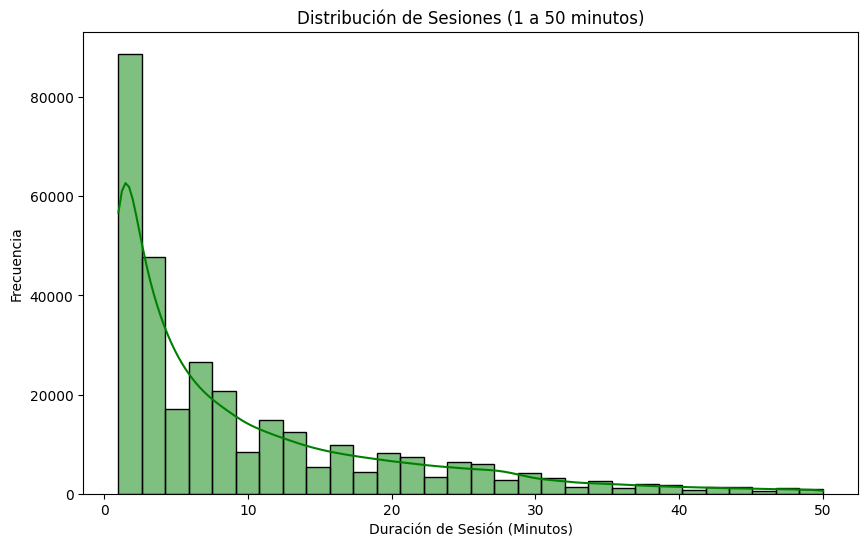

In [38]:
# Filtrar las sesiones entre 1 y 50 minutos
sessions_1_to_50 = visits_data[
    (visits_data['session_duration'] > 1) & 
    (visits_data['session_duration'] <= 50)
]['session_duration']

# Graficar la distribución
plt.figure(figsize=(10, 6))
sns.histplot(sessions_1_to_50, kde=True, bins=30, color="green")
plt.title("Distribución de Sesiones (1 a 50 minutos)")
plt.xlabel("Duración de Sesión (Minutos)")
plt.ylabel("Frecuencia")
plt.show()


Observaciones del Rango de Sesiones (1 a 50 minutos)

1️⃣Predominio de sesiones cortas:

La mayoría de las sesiones en este rango se concentran en los primeros 10 minutos, como se observa en el gráfico.
Esto sugiere que los usuarios generalmente visitan el sitio para realizar tareas rápidas, como buscar eventos o completar compras.

2️⃣Distribución decreciente:

Conforme aumenta la duración de las sesiones, la frecuencia disminuye significativamente.
Las sesiones más largas dentro del rango (cercanas a 50 minutos) son mucho menos comunes.

3️⃣Representatividad del rango:

Este rango incluye el 87.07% del total de sesiones, lo que lo convierte en la base ideal para analizar el comportamiento típico de los usuarios.

Justificación para tomar el rango (1 a 50 minutos) como base:
Predominio de sesiones normales: Este rango representa la actividad promedio de los usuarios en la plataforma.
Exclusión de valores atípicos: Al enfocarnos en este rango, evitamos distorsionar los análisis por sesiones extremas que no representan el comportamiento común.

Investigación futura sobre los casos extremos:
Las sesiones extremadamente largas (≥349 minutos) representan solo el 0.01% del total, pero son interesantes por su atipicidad.
Posibles causas a investigar:
Errores técnicos en la medición de tiempo.
Usuarios que dejaron su sesión abierta sin interacción.
Casos inusuales de navegación prolongada.

Acción recomendada: Identificar patrones en los datos asociados a estas sesiones extremas (dispositivo, fuente de tráfico, etc.) para entender su origen y determinar si son relevantes o anómalos.

Promedio de DAU (Daily Active Users): 907.99
Promedio de MAU (Monthly Active Users): 23228.42
Sticky Factor: 3.91%


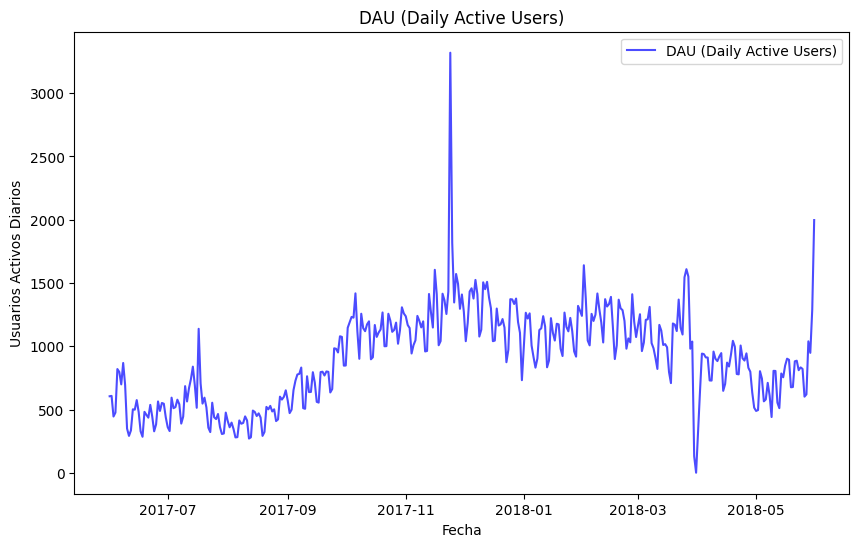

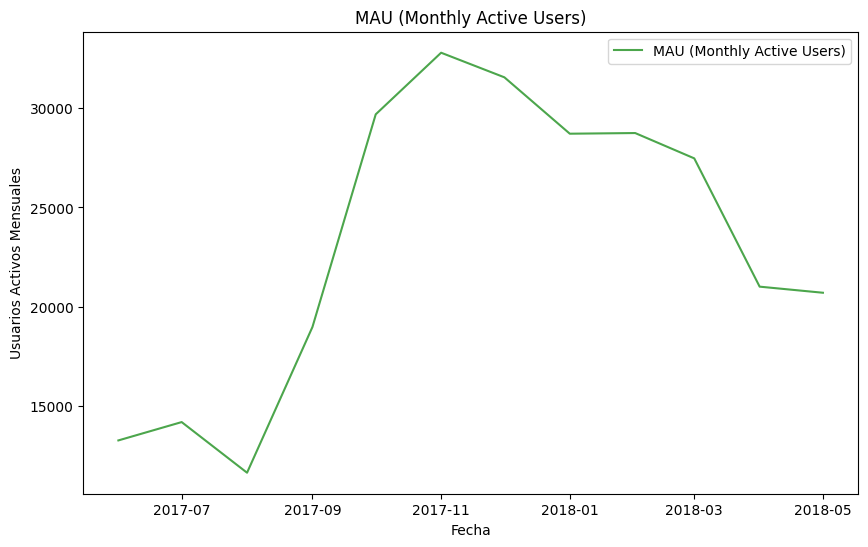

In [39]:
# Asegurarnos de que las fechas estén en el formato correcto
visits_data['start_ts'] = pd.to_datetime(visits_data['start_ts'])

# DAU: Usuarios únicos por día
dau = visits_data.groupby(visits_data['start_ts'].dt.date)['uid'].nunique()

# MAU: Usuarios únicos por mes
mau = visits_data.groupby(visits_data['start_ts'].dt.to_period('M'))['uid'].nunique()

# Promedio DAU y Sticky Factor
avg_dau = dau.mean()
sticky_factor = (avg_dau / mau.mean()) * 100

# Imprimir resultados
print(f"Promedio de DAU (Daily Active Users): {avg_dau:.2f}")
print(f"Promedio de MAU (Monthly Active Users): {mau.mean():.2f}")
print(f"Sticky Factor: {sticky_factor:.2f}%")


# Convertir el índice de MAU a un formato de fecha o cadena
mau.index = mau.index.to_timestamp()  # Convertimos a tipo datetime

# Gráfico: DAU (Daily Active Users)
plt.figure(figsize=(10, 6))
plt.plot(dau, label="DAU (Daily Active Users)", color="blue", alpha=0.7)
plt.title("DAU (Daily Active Users)")
plt.xlabel("Fecha")
plt.ylabel("Usuarios Activos Diarios")
plt.legend()
plt.show()

# Gráfico: MAU (Monthly Active Users)
plt.figure(figsize=(10, 6))
plt.plot(mau, label="MAU (Monthly Active Users)", color="green", alpha=0.7)
plt.title("MAU (Monthly Active Users)")
plt.xlabel("Fecha")
plt.ylabel("Usuarios Activos Mensuales")
plt.legend()
plt.show()



Observaciones

Tendencia de DAU:

El gráfico muestra que los usuarios activos diarios (DAU) tienen fluctuaciones constantes, con picos en algunos días. Estos picos probablemente estén relacionados con eventos importantes en la plataforma.

Tendencia de MAU:

El número de usuarios activos mensuales (MAU) tiene una tendencia mucho más estable, con un aumento considerable en el último trimestre de 2017 y una ligera disminución a partir de 2018.
Esto puede deberse a campañas específicas, estacionalidad o eventos relevantes en esos períodos.

Sticky Factor:

Un Sticky Factor del 3.91% indica que, en promedio, menos del 4% de los usuarios activos mensuales regresan al sitio diariamente.
Esto refuerza la idea de que los usuarios no interactúan diariamente, sino que su comportamiento está ligado a necesidades específicas (como buscar o comprar boletos para eventos).


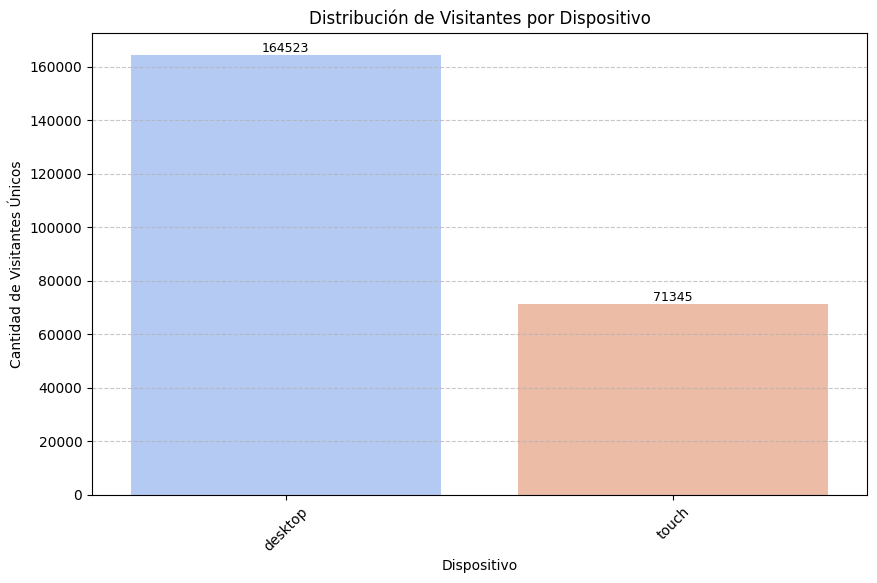

In [40]:
#Contar el número de visitantes únicos por dispositivo
visitors_by_device = visits_data.groupby('device')['uid'].nunique()

# Gráfico: Distribución de visitantes por dispositivo
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=visitors_by_device.index, y=visitors_by_device.values, palette="coolwarm")
plt.title("Distribución de Visitantes por Dispositivo")
plt.xlabel("Dispositivo")
plt.ylabel("Cantidad de Visitantes Únicos")

# Agregar etiquetas de datos
for bar, value in zip(bars.patches, visitors_by_device.values):
    bars.annotate(f'{int(value)}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [41]:
# Calcular el total de visitantes únicos
total_visitors = visitors_by_device.sum()

# Calcular la proporción de cada dispositivo
proportion_by_device = (visitors_by_device / total_visitors) * 100

# Imprimir resultados
print("Proporción de Visitantes por Dispositivo:")
print(proportion_by_device)


Proporción de Visitantes por Dispositivo:
device
desktop    69.75215
touch      30.24785
Name: uid, dtype: float64


Observaciones sobre la Distribución de Visitantes por Dispositivo

Predominio de "Desktop":

69.75% de los visitantes únicos acceden a la plataforma desde dispositivos de escritorio.
Esto indica que la mayoría de los usuarios prefieren utilizar computadoras para interactuar con el sitio.

Uso significativo de "Touch":

30.25% de los visitantes únicos acceden desde dispositivos táctiles (probablemente móviles o tabletas).
Aunque es menor en proporción, este segmento representa un grupo considerable de usuarios.

Conclusión:

La plataforma parece estar orientada a usuarios de escritorio, pero el alto porcentaje de dispositivos táctiles sugiere la importancia de optimizar la experiencia móvil para capturar oportunidades adicionales.

### Ventas 

In [42]:
##Cuándo empieza la gente a comprar

# Asegurarnos de que las fechas estén en formato datetime
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'])
visits_data['start_ts'] = pd.to_datetime(visits_data['start_ts'])

# Obtener la primera fecha de visita (registro) por usuario
first_visit_date = visits_data.groupby('uid')['start_ts'].min()

# Obtener la primera fecha de compra por usuario
first_purchase_date = orders_data.groupby('uid')['buy_ts'].min()

# Combinar las fechas en un solo DataFrame
conversion_data = pd.DataFrame({'first_visit_date': first_visit_date, 'first_purchase_date': first_purchase_date})

# Calcular la diferencia en días entre la primera visita y la primera compra
conversion_data['conversion_days'] = (conversion_data['first_purchase_date'] - conversion_data['first_visit_date']).dt.days

# Categorizar en 0d, 1d, etc.
conversion_data['conversion_category'] = pd.cut(
    conversion_data['conversion_days'], 
    bins=[-1, 0, 1, 7, 30, 90, float('inf')], 
    labels=['0d', '1d', '1w', '1m', '3m', '>3m']
)

# Calcular la distribución de conversiones
conversion_distribution = conversion_data['conversion_category'].value_counts(normalize=True) * 100

# Imprimir resultados
print("Distribución de Conversiones (Categorías):")
print(conversion_distribution)


Distribución de Conversiones (Categorías):
0d     72.181913
>3m     7.195466
3m      6.226214
1m      5.963366
1w      5.664923
1d      2.768119
Name: conversion_category, dtype: float64


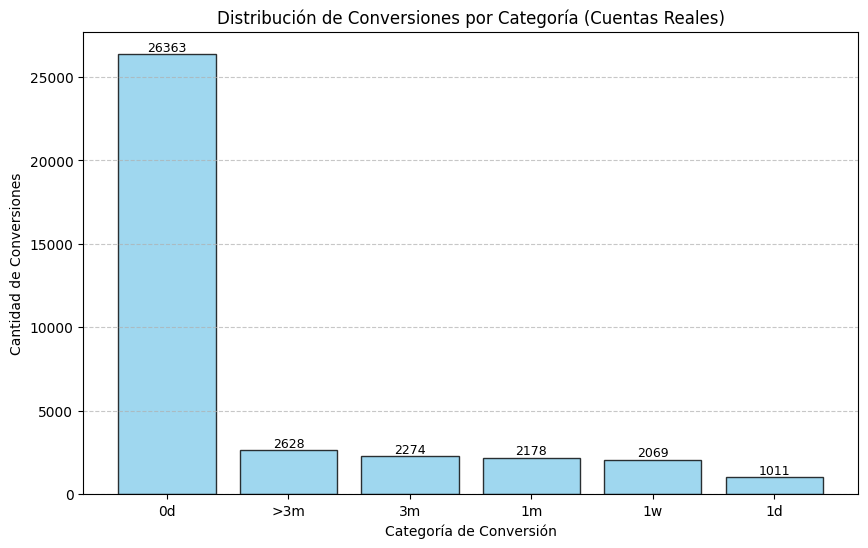

In [43]:
# Calcular la cuenta de conversiones por categoría
conversion_counts = conversion_data['conversion_category'].value_counts()

# Graficar las cuentas de conversiones
plt.figure(figsize=(10, 6))
bars = plt.bar(conversion_counts.index, conversion_counts.values, color='skyblue', edgecolor='black', alpha=0.8)
plt.title("Distribución de Conversiones por Categoría (Cuentas Reales)")
plt.xlabel("Categoría de Conversión")
plt.ylabel("Cantidad de Conversiones")
plt.xticks(rotation=0)

# Agregar etiquetas de datos
for bar, count in zip(bars, conversion_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observaciones de la Distribución de Conversiones

Predominio de Conversiones el Mismo Día (0d):

La categoría 0d tiene 26,363 conversiones, representando la gran mayoría de las compras.
Esto confirma que los usuarios se registran y compran sus boletos el mismo día en la mayoría de los casos.

Pocas Conversiones Posteriores (1d o más):

Las categorías 1d, 1w, 1m, 3m, y >3m tienen cantidades significativamente menores, indicando que los usuarios que no convierten inmediatamente tienen menos probabilidades de hacerlo en el futuro.

Confirmación del Comportamiento del Usuario

Registro y compra en una sola sesión:

Los resultados respaldan el análisis anterior, donde:
72.18% de las conversiones ocurren en el mismo día (0d).
La duración promedio de una sesión es de 10 minutos, lo cual es suficiente para buscar y comprar boletos para un evento.

Patrón basado en eventos específicos:

El análisis de cohortes muestra que cada cohorte recibe una gran cantidad de usuarios únicos (UIDs) que interactúan con la plataforma solo para eventos específicos. Una vez que completan su compra, la mayoría no regresa, lo cual es común en este tipo de plataformas transaccionales.

Conducta específica:

Los usuarios visitan el sitio con un propósito claro (comprar boletos para un evento) y no tienden a interactuar recurrentemente a menos que haya otro evento de su interés.

Conclusión

Comportamiento esperado: Los usuarios de la plataforma tienen un comportamiento transaccional muy definido:

Registro y conversión inmediata (0d): Este es el caso predominante.
Sesión breve: La compra suele completarse en sesiones cortas (promedio de 10 minutos).
No retorno: Los usuarios generalmente no regresan a menos que tengan un interés puntual en otro evento.

Estrategias potenciales:

Implementar mecanismos de retención para incentivar compras adicionales, como recomendaciones de eventos o descuentos en boletos futuros.
Crear campañas para capturar la atención de usuarios que no convierten inmediatamente (1d o más).


In [48]:
## conversión por canal de marketing 
# Calcular total de usuarios únicos por canal
total_users_by_channel = visits_data.groupby('source_id')['uid'].nunique()

# Calcular total de usuarios convertidos por canal
converted_users_by_channel = orders_data.merge(
    visits_data[['uid', 'source_id']], on='uid', how='left'
).groupby('source_id')['uid'].nunique()

# Calcular tasa de conversión por canal
conversion_rate_by_channel = (converted_users_by_channel / total_users_by_channel) * 100

# Asegurar que los canales sin conversiones tengan valor 0
converted_users_by_channel = converted_users_by_channel.reindex(total_users_by_channel.index, fill_value=0)
conversion_rate_by_channel = conversion_rate_by_channel.reindex(total_users_by_channel.index, fill_value=0)

# Ordenar las métricas de forma ascendente
converted_users_sorted = converted_users_by_channel.sort_values()
conversion_rate_sorted = conversion_rate_by_channel.sort_values()



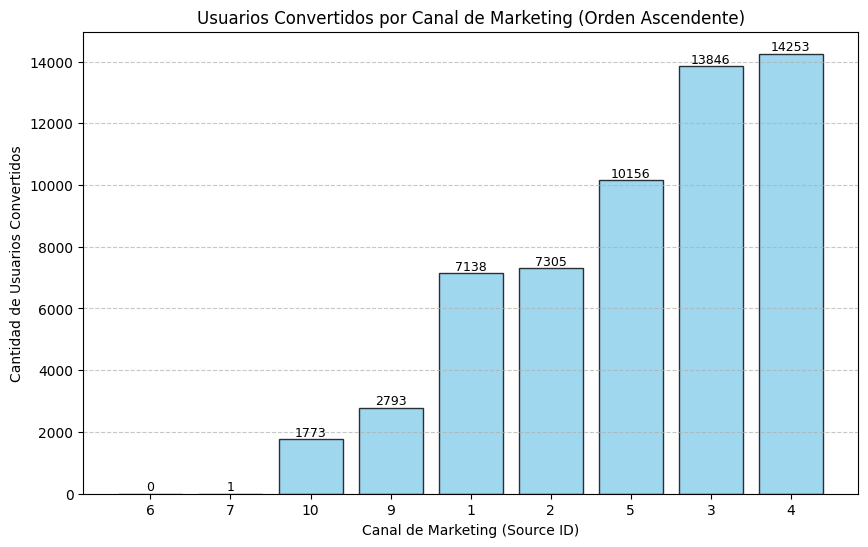

In [46]:
# Gráfico 1: Usuarios Convertidos por Canal (orden ascendente)
plt.figure(figsize=(10, 6))
bars = plt.bar(converted_users_sorted.index.astype(str), converted_users_sorted.values, 
               color='skyblue', edgecolor='black', alpha=0.8)
plt.title("Usuarios Convertidos por Canal de Marketing (Orden Ascendente)")
plt.xlabel("Canal de Marketing (Source ID)")
plt.ylabel("Cantidad de Usuarios Convertidos")
plt.xticks(rotation=0)

# Agregar etiquetas de datos
for bar, value in zip(bars, converted_users_sorted.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(value)}', 
             ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


posx and posy should be finite values
posx and posy should be finite values


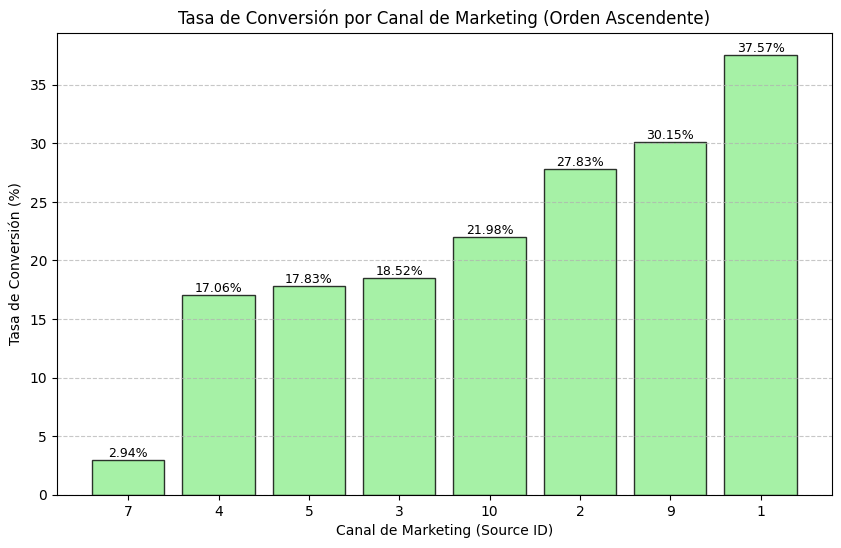

In [47]:
# Gráfico 2: Tasa de Conversión por Canal (orden ascendente)
plt.figure(figsize=(10, 6))
bars = plt.bar(conversion_rate_sorted.index.astype(str), conversion_rate_sorted.values, 
               color='lightgreen', edgecolor='black', alpha=0.8)
plt.title("Tasa de Conversión por Canal de Marketing (Orden Ascendente)")
plt.xlabel("Canal de Marketing (Source ID)")
plt.ylabel("Tasa de Conversión (%)")
plt.xticks(rotation=0)

# Agregar etiquetas de datos
for bar, value in zip(bars, conversion_rate_sorted.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%', 
             ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observaciones sobre los Canales de Marketing (Con Datos de Visitantes)

Canal 4:

Visitantes Totales: 83,525 usuarios únicos.
Usuarios Convertidos: 14,573.
Tasa de Conversión: 17.44%.
Aunque su tasa de conversión no es la más alta, su volumen de visitantes asegura el mayor número de conversiones absolutas.

Canal 3:

Visitantes Totales: 74,756 usuarios únicos.
Usuarios Convertidos: 13,646.
Tasa de Conversión: 18.25%.
Similar al canal 4, logra mantener un balance entre un alto volumen de visitantes y una conversión decente.

Canal 1:

Visitantes Totales: 18,999 usuarios únicos.
Usuarios Convertidos: 7,103.
Tasa de Conversión: 37.57%.
Aunque tiene menos visitantes, su tasa de conversión sobresaliente lo posiciona como el canal más eficiente.

Canal 6:

Visitantes Totales: 6 usuarios únicos.
Usuarios Convertidos: 0.
Tasa de Conversión: 0%.
Su ínfimo volumen de usuarios y 0 conversiones indican que no es un canal efectivo.

Canal 7:

Visitantes Totales: 34 usuarios únicos.
Usuarios Convertidos: 1.
Tasa de Conversión: 2.41%.
Aunque tiene conversiones mínimas, su bajo volumen y tasa indican problemas significativos en la calidad de los usuarios atraídos.

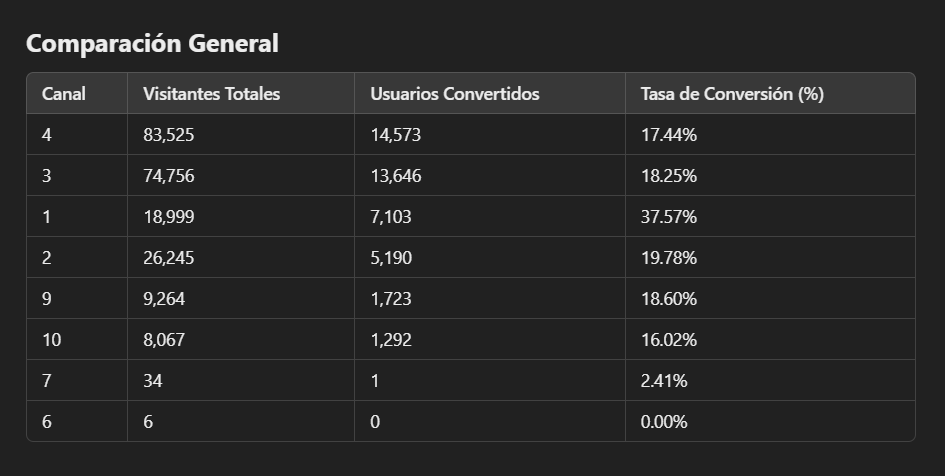

Conclusiones
Canales Clave:

Los canales 1, 3, y 4 son los más efectivos para convertir visitantes en clientes.
El canal 1 destaca especialmente por su alta tasa de conversión, aunque tiene un menor volumen de visitantes.

Canales Problemáticos:

Canal 6: Sin conversiones y un volumen extremadamente bajo.
Canal 7: Tasa de conversión muy baja (2.41%) y un bajo volumen de visitantes, lo que indica baja calidad en el tráfico.

Estrategias Recomendadas:

Optimizar campañas en los canales 1, 3, y 4 para mantener su efectividad.
Reevaluar los canales 6 y 7, ya que su desempeño actual no justifica inversiones adicionales.

In [49]:
## Cruzar datos (canal de marketing y tiempo de conversión)
## Proporción de conversión por canal y categoría de conversión

# Combinar datos de conversiones con el canal de marketing del usuario (source_id)
user_sources = visits_data.groupby('uid')['source_id'].first()  # Primer canal de cada usuario
conversion_data = conversion_data.merge(user_sources, left_index=True, right_index=True)

# Calcular la proporción de usuarios convertidos (0d o 1d) por canal
conversion_by_channel = conversion_data[conversion_data['conversion_category'].isin(['0d', '1d'])] \
    .groupby('source_id')['conversion_category'].count()

# Calcular proporción total de conversiones por canal
total_conversions_by_channel = conversion_data.groupby('source_id')['conversion_category'].count()

# Proporción de conversiones 0d y 1d por canal
proportion_by_channel = (conversion_by_channel / total_conversions_by_channel) * 100

# Imprimir resultados
print("Proporción de Conversiones (0d y 1d) por Canal:")
print(proportion_by_channel)


Proporción de Conversiones (0d y 1d) por Canal:
source_id
1      73.924659
10     80.419017
2      67.013648
3      77.434887
4      74.692049
5      79.719257
6            NaN
7     100.000000
9      59.787986
Name: conversion_category, dtype: float64


Observaciones sobre la Proporción de Conversiones (0d y 1d) por Canal

Confirmación del Comportamiento General:

La mayoría de los canales tienen una alta proporción de conversiones dentro del rango 0d y 1d, lo que confirma el comportamiento esperado de los usuarios: registrarse y realizar la compra rápidamente.

Canales Destacados:

Canal 10: Tiene la mayor proporción de conversiones en el rango 0d y 1d con un 80.42%, lo que indica que este canal atrae usuarios con una intención inmediata de compra.
Canal 7: Aunque su volumen de conversiones es bajo, tiene un 100% de conversiones dentro de este rango, lo que puede ser un caso aislado debido a la baja cantidad de visitantes.

Canales con Proporciones Menores:

Canal 9: Tiene la proporción más baja (59.79%) dentro de este rango, lo que podría indicar que los usuarios que llegan a través de este canal necesitan más tiempo para decidirse.
Canal 6: No tiene datos de conversiones (proporción NaN), lo que refuerza la observación de que este canal no genera conversiones.

Conclusión:

Los canales con alta proporción de conversiones en 0d y 1d son los más alineados con el comportamiento transaccional de los usuarios de la plataforma.
Aunque el canal 7 muestra una proporción perfecta, su bajo volumen de usuarios lo limita en términos de impacto.

Siguiente paso sugerido:

Integrar estos resultados con costos por canal para calcular el retorno sobre inversión (ROI) y priorizar los canales más eficientes.

In [50]:
##Pedidos por período (diario, semanal, mensual)

# Crear columnas de tiempo para agrupar por día, semana y mes
orders_data['order_date'] = orders_data['buy_ts'].dt.date
orders_data['order_week'] = orders_data['buy_ts'].dt.to_period('W')
orders_data['order_month'] = orders_data['buy_ts'].dt.to_period('M')

# Contar pedidos por período
daily_orders = orders_data.groupby('order_date')['uid'].count()
weekly_orders = orders_data.groupby('order_week')['uid'].count()
monthly_orders = orders_data.groupby('order_month')['uid'].count()

# Imprimir resultados
print(f"Promedio diario de pedidos: {daily_orders.mean():.2f}")
print(f"Promedio semanal de pedidos: {weekly_orders.mean():.2f}")
print(f"Promedio mensual de pedidos: {monthly_orders.mean():.2f}")


Promedio diario de pedidos: 138.50
Promedio semanal de pedidos: 951.23
Promedio mensual de pedidos: 3878.08


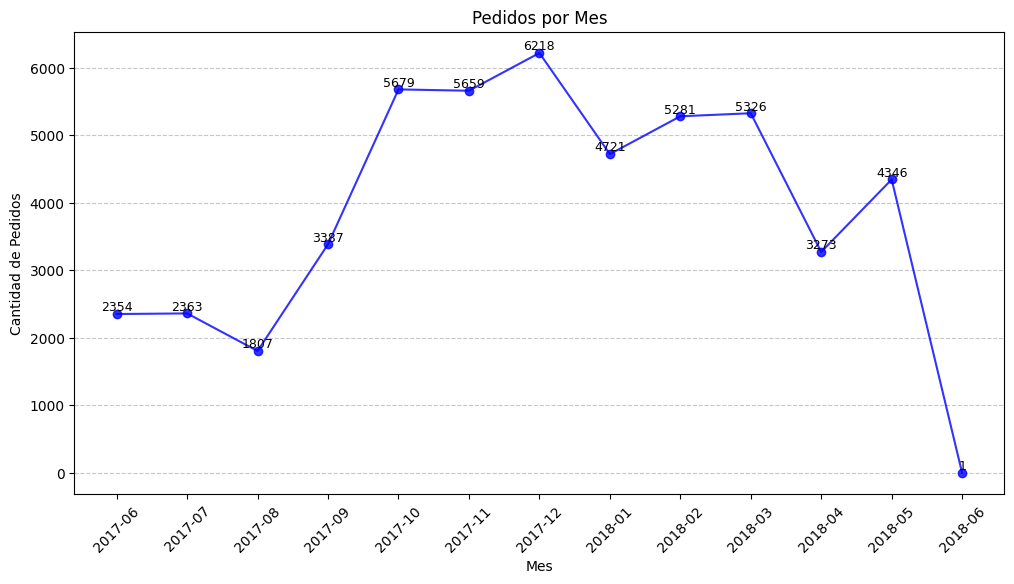

In [51]:
# Asegurarnos de que las fechas estén en formato datetime
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'])

# Agrupar los pedidos por mes
orders_by_month = orders_data.groupby(orders_data['buy_ts'].dt.to_period('M')).size()

# Gráfico: Pedidos por Mes
plt.figure(figsize=(12, 6))
plt.plot(orders_by_month.index.astype(str), orders_by_month.values, marker='o', linestyle='-', color='blue', alpha=0.8)
plt.title("Pedidos por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Pedidos")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de datos
for x, y in zip(orders_by_month.index.astype(str), orders_by_month.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=9)

plt.show()


La cantidad de pedidos parece estar directamente influenciada por la programación de eventos, lo que resalta la importancia de analizar las tendencias de la industria para planificar campañas y estrategias.

In [52]:
##  Tamaño promedio de compra

# Calcular el tamaño promedio de compra (Revenue por pedido)
average_order_size = orders_data['revenue'].mean()

# Imprimir el resultado
print(f"Tamaño promedio de compra: ${average_order_size:.2f}")

Tamaño promedio de compra: $5.00


In [53]:
# Asegurarnos de que las fechas están en formato datetime
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'])

# Combinar `orders_data` con `visits_data` para agregar información de dispositivos y canales
orders_with_info = orders_data.merge(visits_data[['uid', 'device', 'source_id']], on='uid', how='left')

# Tamaño promedio de compra por dispositivo
avg_order_size_by_device = orders_with_info.groupby('device')['revenue'].mean()

# Tamaño promedio de compra por canal de marketing
avg_order_size_by_channel = orders_with_info.groupby('source_id')['revenue'].mean()

# Tamaño promedio de compra por mes
avg_order_size_by_month = orders_with_info.groupby(orders_with_info['buy_ts'].dt.to_period('M'))['revenue'].mean()

# Imprimir los resultados
print("Tamaño promedio de compra por dispositivo:")
print(avg_order_size_by_device)

print("\nTamaño promedio de compra por canal de marketing:")
print(avg_order_size_by_channel)

print("\nTamaño promedio de compra por mes:")
print(avg_order_size_by_month)


Tamaño promedio de compra por dispositivo:
device
desktop     9.040895
touch      10.579314
Name: revenue, dtype: float64

Tamaño promedio de compra por canal de marketing:
source_id
1      9.242265
10     3.630303
2     11.071013
3      6.344095
4      7.923842
5      7.781887
7      1.220000
9      3.806667
Name: revenue, dtype: float64

Tamaño promedio de compra por mes:
buy_ts
2017-06     5.732470
2017-07     7.390010
2017-08     5.901971
2017-09    11.334179
2017-10     9.337978
2017-11     7.310166
2017-12    14.263328
2018-01     7.234294
2018-02     7.311842
2018-03    10.187199
2018-04    11.005782
2018-05     6.423946
2018-06     3.420000
Freq: M, Name: revenue, dtype: float64


In [54]:
# Calcular las métricas generales de los tamaños de pedido
min_order_size = orders_data['revenue'].min()
max_order_size = orders_data['revenue'].max()
mode_order_size = orders_data['revenue'].mode()

# Imprimir los resultados
print(f"Tamaño mínimo de pedido: {min_order_size:.2f}")
print(f"Tamaño máximo de pedido: {max_order_size:.2f}")
print(f"Moda del tamaño de pedido: {', '.join(map(str, mode_order_size.values))}")


Tamaño mínimo de pedido: 0.00
Tamaño máximo de pedido: 2633.28
Moda del tamaño de pedido: 1.83


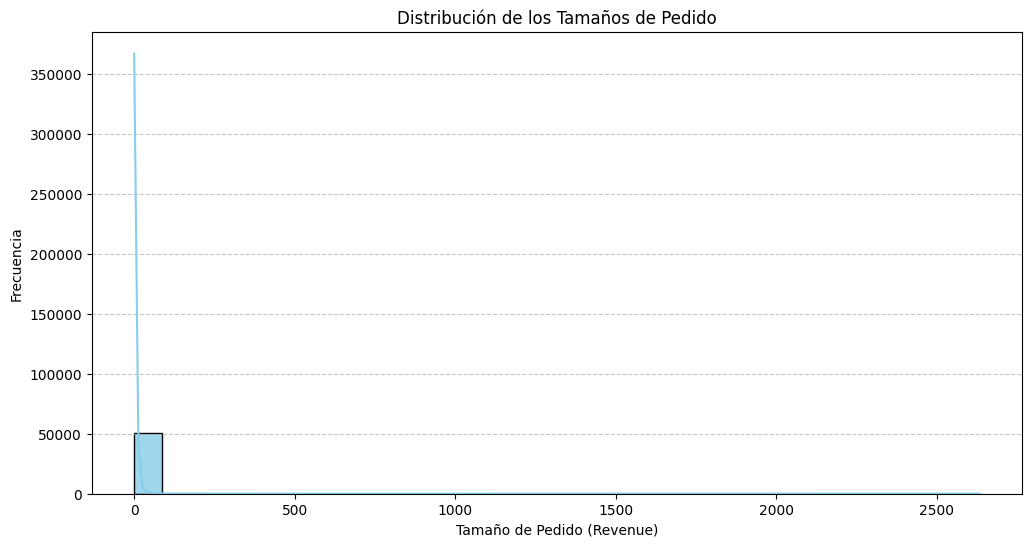

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico: Distribución de los tamaños de pedido
plt.figure(figsize=(12, 6))
sns.histplot(orders_data['revenue'], kde=True, bins=30, color='skyblue', alpha=0.8)
plt.title("Distribución de los Tamaños de Pedido")
plt.xlabel("Tamaño de Pedido (Revenue)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


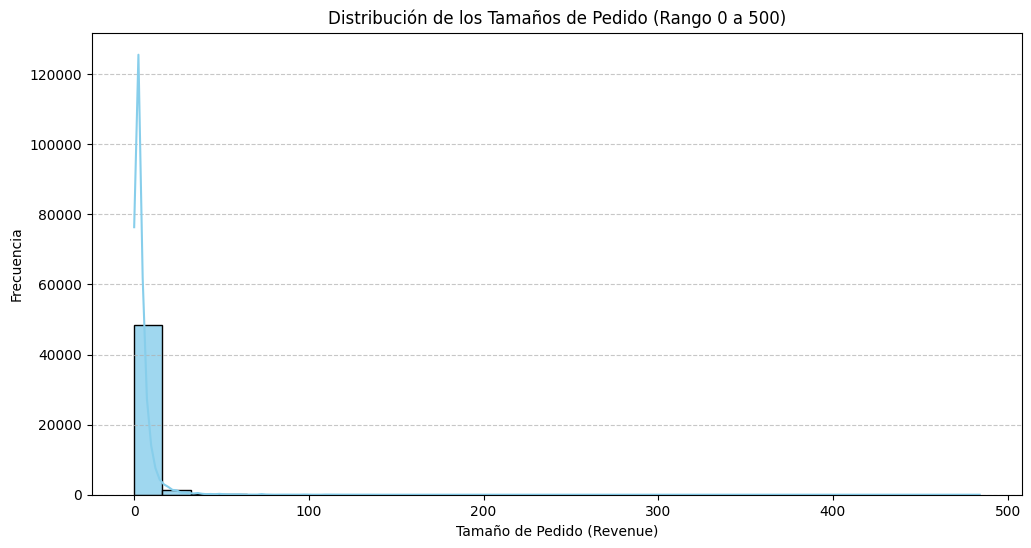

Porcentaje de pedidos en el rango 0 a 500: 99.87%


In [57]:
# Filtrar los pedidos dentro del rango de 0 a 500
orders_in_range = orders_data[(orders_data['revenue'] > 0) & (orders_data['revenue'] <= 500)]

# Calcular el porcentaje de pedidos en este rango
percentage_in_range = (len(orders_in_range) / len(orders_data)) * 100

# Gráfico: Distribución de los tamaños de pedido en el rango 0 a 500
plt.figure(figsize=(12, 6))
sns.histplot(orders_in_range['revenue'], kde=True, bins=30, color='skyblue', alpha=0.8)
plt.title("Distribución de los Tamaños de Pedido (Rango 0 a 500)")
plt.xlabel("Tamaño de Pedido (Revenue)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Imprimir el porcentaje
print(f"Porcentaje de pedidos en el rango 0 a 500: {percentage_in_range:.2f}%")


In [58]:
# Calcular el promedio y la moda del rango 0 a 500
average_in_range = orders_in_range['revenue'].mean()
mode_in_range = orders_in_range['revenue'].mode()

# Imprimir resultados
print(f"Promedio de tamaños de pedido en el rango 0 a 500: {average_in_range:.2f}")
print(f"Moda de tamaños de pedido en el rango 0 a 500: {', '.join(map(str, mode_in_range.values))}")


Promedio de tamaños de pedido en el rango 0 a 500: 4.73
Moda de tamaños de pedido en el rango 0 a 500: 1.83


 Observaciones sobre el Tamaño de Compra
 
Distribución General:

El 99.87% de los pedidos se encuentran en el rango de 0 a 500, con un tamaño promedio de compra de 4.73 y una moda de 1.83.
Esto indica que la mayoría de las compras corresponden a boletos individuales o de bajo valor.
Existe un espectro interesante por encima de 100 que debería ser investigado en futuros análisis para entender las compras más grandes y si corresponden a paquetes, eventos especiales o usuarios específicos.

Por Canal de Marketing:

El canal 2 lidera en tamaño promedio de compra con 11.07, posiblemente porque atrae clientes con un mayor presupuesto o eventos de mayor precio.
El canal 1 y el canal 10 muestran comportamientos diferentes:
Canal 1: Un tamaño promedio de compra de 9.24, consistente con su alta tasa de conversión.
Canal 10: Tiene el tamaño promedio más bajo (3.63), lo que podría indicar que este canal atrae compradores de menor gasto.
Canal 7: Tiene el tamaño promedio más bajo (1.22), consistente con su bajo rendimiento en conversión y visitantes.

Por Mes:

Se observan fluctuaciones en el tamaño promedio de compra:
Picos altos: Septiembre de 2017 (11.33) y marzo de 2018 (10.18) podrían coincidir con ventas de boletos para eventos premium o múltiples.
Picos bajos: Junio de 2018 (3.42) y abril de 2018 (6.42) podrían reflejar menor actividad o eventos de menor valor.
Estos patrones podrían estar influenciados por la programación y características de los eventos vendidos en cada periodo.

Conclusión:

La mayoría de las compras son pequeñas, lo que sugiere que los usuarios generalmente buscan boletos individuales.
Los canales y meses con mayor tamaño promedio de compra pueden ser optimizados para atraer aún más clientes con mayor poder adquisitivo.
El espectro superior de compras, especialmente aquellas por encima de 100, merece un análisis separado para identificar oportunidades adicionales o tendencias específicas.

Siguiente paso sugerido:

Investigar las compras fuera del rango principal (por encima de 500) para comprender el comportamiento de estos clientes y su contribución al revenue global.

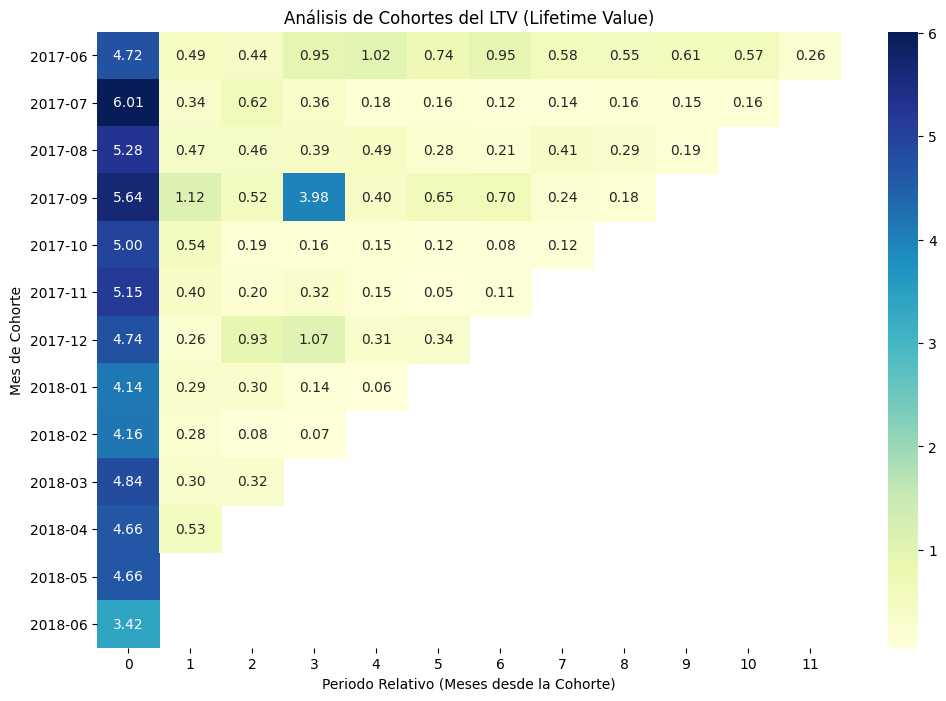

Tabla de Cohortes del LTV (Lifetime Value):
cohort_period        0         1         2         3         4         5   \
cohort_month                                                                
2017-06        4.724414  0.485329  0.437637  0.954671  1.022531  0.735502   
2017-07        6.010218  0.335211  0.623531  0.358976  0.176791  0.156048   
2017-08        5.276518  0.471993  0.458482  0.391277  0.494051  0.283540   
2017-09        5.644529  1.117586  0.520930  3.975792  0.400558  0.647067   
2017-10        5.003733  0.535763  0.191394  0.157145  0.151560  0.120362   
2017-11        5.154683  0.399233  0.199556  0.324952  0.148013  0.053879   
2017-12        4.738191  0.260374  0.925097  1.065275  0.312930  0.338047   
2018-01        4.135636  0.294758  0.304281  0.142778  0.062698       NaN   
2018-02        4.156987  0.278274  0.078515  0.074144       NaN       NaN   
2018-03        4.838803  0.300892  0.315559       NaN       NaN       NaN   
2018-04        4.657597  0.53159

In [59]:
## LTV

# Crear una columna para identificar el mes de la primera compra de cada usuario (cohorte)
orders_data['cohort_month'] = orders_data.groupby('uid')['buy_ts'].transform(lambda x: x.min().to_period('M'))

# Crear una columna para identificar el mes relativo desde la cohorte
orders_data['cohort_period'] = (
    (orders_data['buy_ts'].dt.to_period('M') - orders_data['cohort_month']).apply(lambda x: x.n)
)

# Calcular el revenue total por cohorte y periodo relativo
revenue_cohort = orders_data.groupby(['cohort_month', 'cohort_period'])['revenue'].sum().reset_index()

# Calcular el número de usuarios únicos por cohorte
users_cohort = orders_data.groupby('cohort_month')['uid'].nunique().reset_index()
users_cohort.rename(columns={'uid': 'num_users'}, inplace=True)

# Combinar revenue y número de usuarios
ltv_cohort = revenue_cohort.merge(users_cohort, on='cohort_month')
ltv_cohort['ltv'] = ltv_cohort['revenue'] / ltv_cohort['num_users']

# Crear una tabla dinámica para el análisis de cohortes del LTV
ltv_table = ltv_cohort.pivot_table(
    index='cohort_month',
    columns='cohort_period',
    values='ltv',
    aggfunc='sum'
)

# Visualizar la tabla de cohortes con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ltv_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Análisis de Cohortes del LTV (Lifetime Value)")
plt.xlabel("Periodo Relativo (Meses desde la Cohorte)")
plt.ylabel("Mes de Cohorte")
plt.show()

# Imprimir la tabla de cohortes
print("Tabla de Cohortes del LTV (Lifetime Value):")
print(ltv_table)


Observaciones sobre el Análisis de Cohortes del LTV

Tendencia General:

Los valores más altos del LTV se concentran en el mes inicial (0 del periodo relativo), lo cual es consistente con el comportamiento esperado: los usuarios tienden a realizar sus compras de boletos en su primera interacción con la plataforma.
En meses posteriores, el LTV decrece significativamente, lo que refuerza la hipótesis de que la mayoría de los usuarios no regresa para realizar compras adicionales.

Picos Notables:

Septiembre 2017 (Cohorte): Tiene un pico destacado de 3.98 en el periodo relativo 1 (segundo mes desde la primera interacción), lo cual podría estar relacionado con eventos recurrentes que impulsaron compras adicionales.
Otras cohortes muestran una caída más acelerada, con valores cercanos a 0.10-0.20 en meses posteriores.

Conclusión:

La mayoría de los ingresos se generan en el primer mes de interacción del usuario.
Septiembre de 2017 es un caso interesante que podría investigarse para entender las causas de su mejor desempeño.


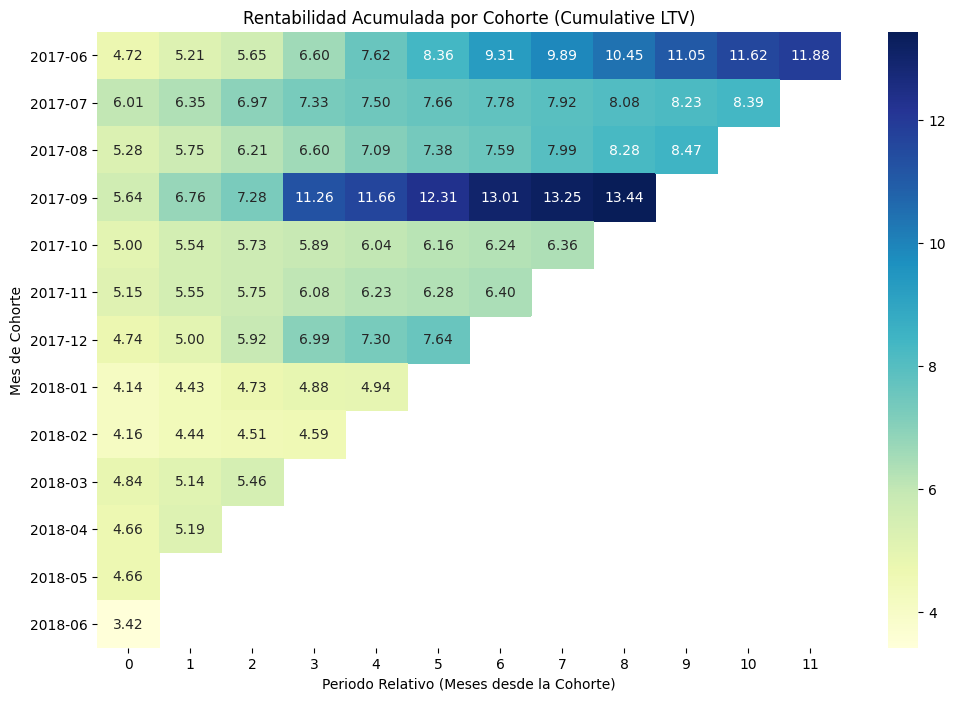

In [60]:
## Calcular el LTV acumulado por cohorte
ltv_cohort['cumulative_ltv'] = ltv_cohort.groupby('cohort_month')['ltv'].cumsum()

# Crear una tabla dinámica para la rentabilidad acumulada
cumulative_ltv_table = ltv_cohort.pivot_table(
    index='cohort_month',
    columns='cohort_period',
    values='cumulative_ltv',
    aggfunc='sum'
)

# Calcular el LTV promedio por cohorte
ltv_average_by_cohort = ltv_cohort.groupby('cohort_month')['ltv'].mean()

# Visualizar la tabla de rentabilidad acumulada con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cumulative_ltv_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Rentabilidad Acumulada por Cohorte (Cumulative LTV)")
plt.xlabel("Periodo Relativo (Meses desde la Cohorte)")
plt.ylabel("Mes de Cohorte")
plt.show()


In [61]:
# Imprimir la tabla de rentabilidad acumulada
print("Tabla de Rentabilidad Acumulada (Cumulative LTV):")
print(cumulative_ltv_table)

Tabla de Rentabilidad Acumulada (Cumulative LTV):
cohort_period        0         1         2          3          4          5   \
cohort_month                                                                   
2017-06        4.724414  5.209743  5.647380   6.602051   7.624582   8.360084   
2017-07        6.010218  6.345429  6.968960   7.327936   7.504727   7.660775   
2017-08        5.276518  5.748511  6.206993   6.598270   7.092321   7.375861   
2017-09        5.644529  6.762115  7.283045  11.258838  11.659396  12.306463   
2017-10        5.003733  5.539495  5.730889   5.888035   6.039594   6.159956   
2017-11        5.154683  5.553916  5.753472   6.078424   6.226437   6.280316   
2017-12        4.738191  4.998565  5.923662   6.988937   7.301866   7.639913   
2018-01        4.135636  4.430394  4.734675   4.877453   4.940151        NaN   
2018-02        4.156987  4.435262  4.513777   4.587921        NaN        NaN   
2018-03        4.838803  5.139694  5.455253        NaN        NaN     

In [62]:
# Imprimir el LTV promedio por cohorte
print("\nLTV Promedio por Cohorte:")
print(ltv_average_by_cohort)


LTV Promedio por Cohorte:
cohort_month
2017-06    0.989936
2017-07    0.762441
2017-08    0.847172
2017-09    1.492803
2017-10    0.795030
2017-11    0.913606
2017-12    1.273319
2018-01    0.988030
2018-02    1.146980
2018-03    1.818418
2018-04    2.594598
2018-05    4.660562
2018-06    3.420000
Freq: M, Name: ltv, dtype: float64


Observaciones sobre la Rentabilidad Acumulada por Cohorte (Cumulative LTV)

Tendencia General:

El LTV acumulado crece de forma progresiva en todas las cohortes, alcanzando un punto de saturación alrededor del mes 8-10, lo que indica que las compras recurrentes disminuyen significativamente después de este periodo.

 Cohortes Destacadas:

Septiembre 2017: Esta cohorte tiene el LTV acumulado más alto con 13.44, posiblemente debido a eventos específicos que generaron múltiples compras recurrentes o de mayor valor.
Junio 2017: Muestra un crecimiento constante, alcanzando 11.88, indicando que los usuarios de esta cohorte también tienen un buen rendimiento a lo largo del tiempo.

Diferencias entre Cohortes:

Las cohortes más recientes (por ejemplo, enero y marzo de 2018) presentan un LTV acumulado menor, probablemente porque tuvieron menos tiempo para desarrollar compras recurrentes.

Conclusión:

Las cohortes iniciales (2017) muestran un desempeño significativamente mejor en términos de rentabilidad acumulada, lo que podría estar relacionado con campañas de marketing más efectivas, eventos más atractivos, o cambios en la estrategia del negocio.
El comportamiento sugiere que, para maximizar el LTV, la mayoría de los esfuerzos deben enfocarse en capturar compras dentro de los primeros meses del ciclo de vida del cliente.

### Marketing/negocio

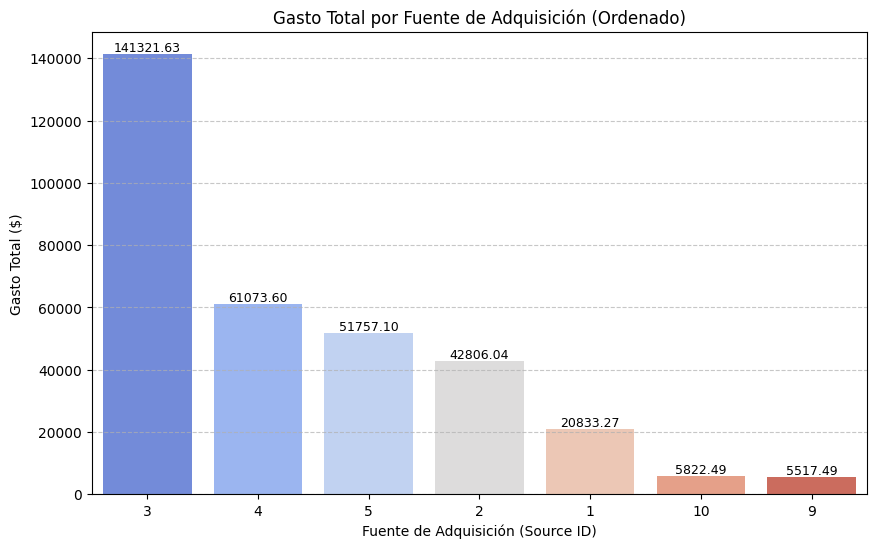

In [63]:
##Calcular y Graficar Gastos Totales

# Ordenar los gastos por fuente de adquisición de forma descendente
spent_by_source = costs_data.groupby('source_id')['costs'].sum()
spent_by_source_sorted = spent_by_source.sort_values(ascending=False)

# Gráfico: Gasto Total por Fuente de Adquisición (ordenado)
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=spent_by_source_sorted.index.astype(str), y=spent_by_source_sorted.values, palette="coolwarm")
plt.title("Gasto Total por Fuente de Adquisición (Ordenado)")
plt.xlabel("Fuente de Adquisición (Source ID)")
plt.ylabel("Gasto Total ($)")
for bar, value in zip(bars.patches, spent_by_source_sorted.values):
    bars.annotate(f'{value:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [64]:
## Areglar unos errores en un merge que estaba generando discrepcncias en montos de ingresos y gastos totales 
visits_data = visits_data.drop_duplicates(subset='uid', keep='first')

In [65]:
merged_data = orders_data.merge(visits_data[['uid', 'source_id']], on='uid', how='left')


In [66]:
print(merged_data.duplicated().sum())
print(orders_data['revenue'].sum())
print(merged_data['revenue'].sum())


0
252057.19999999998
252057.19999999998


In [67]:
# Calcular el total de gastos y el total de ingresos
total_spent = costs_data['costs'].sum()
total_revenue = orders_data['revenue'].sum()

# Crear tabla groupby month con revenue, costos y profit
financials_by_month = merged_data.groupby(merged_data['buy_ts'].dt.to_period('M')).agg(
    Revenue=('revenue', 'sum')
).join(
    costs_data.groupby(costs_data['dt'].dt.to_period('M'))['costs'].sum()
)

financials_by_month['Profit'] = financials_by_month['Revenue'] - financials_by_month['costs']

# Crear tabla groupby source con revenue, costos y profit
financials_by_source = merged_data.groupby('source_id').agg(
    Revenue=('revenue', 'sum')
).join(
    costs_data.groupby('source_id')['costs'].sum()
)

financials_by_source['Profit'] = financials_by_source['Revenue'] - financials_by_source['costs']

# Mostrar los resultados de totales
totals = {
    "Total Spent ($)": total_spent,
    "Total Revenue ($)": total_revenue,
    "Profit ($)": total_revenue - total_spent
}

# Visualizar las tablas
print("\nTotales:")
print(totals)

print("\nFinancials Grouped by Month:")
print(financials_by_month)

print("\nFinancials Grouped by Source:")
print(financials_by_source)



Totales:
{'Total Spent ($)': 329131.62, 'Total Revenue ($)': 252057.19999999998, 'Profit ($)': -77074.42000000001}

Financials Grouped by Month:
          Revenue     costs    Profit
buy_ts                               
2017-06   9557.49  18015.00  -8457.51
2017-07  12539.47  18240.59  -5701.12
2017-08   8758.78  14790.54  -6031.76
2017-09  18345.51  24368.91  -6023.40
2017-10  27987.70  36322.88  -8335.18
2017-11  27069.93  37907.88 -10837.95
2017-12  36388.60  38315.35  -1926.75
2018-01  19417.13  33518.52 -14101.39
2018-02  25560.54  32723.03  -7162.49
2018-03  28834.59  30415.27  -1580.68
2018-04  16858.06  22289.38  -5431.32
2018-05  20735.98  22224.27  -1488.29
2018-06      3.42       NaN       NaN

Financials Grouped by Source:
            Revenue      costs    Profit
source_id                               
1          38560.06   20833.27  17726.79
10          4111.34    5822.49  -1711.15
2          65152.26   42806.04  22346.22
3          44317.68  141321.63 -97003.95
4      

In [68]:
# Verificar totales en la tabla agrupada por mes
revenue_month_total = financials_by_month['Revenue'].sum()
costs_month_total = financials_by_month['costs'].sum()
profit_month_total = financials_by_month['Profit'].sum()

# Verificar totales en la tabla agrupada por fuente
revenue_source_total = financials_by_source['Revenue'].sum()
costs_source_total = financials_by_source['costs'].sum()
profit_source_total = financials_by_source['Profit'].sum()

# Comparar con los totales globales
verification_results = {
    "Totales globales": {
        "Ingresos ($)": total_revenue,
        "Gastos ($)": total_spent,
        "Beneficio ($)": total_revenue - total_spent
    },
    "Totales por mes": {
        "Ingresos ($)": revenue_month_total,
        "Gastos ($)": costs_month_total,
        "Beneficio ($)": profit_month_total
    },
    "Totales por fuente": {
        "Ingresos ($)": revenue_source_total,
        "Gastos ($)": costs_source_total,
        "Beneficio ($)": profit_source_total
    }
}

print(verification_results)


{'Totales globales': {'Ingresos ($)': 252057.19999999998, 'Gastos ($)': 329131.62, 'Beneficio ($)': -77074.42000000001}, 'Totales por mes': {'Ingresos ($)': 252057.19999999847, 'Gastos ($)': 329131.61999999994, 'Beneficio ($)': -77077.84000000155}, 'Totales por fuente': {'Ingresos ($)': 252057.20000000327, 'Gastos ($)': 329131.6199999999, 'Beneficio ($)': -77075.63999999662}}


In [72]:
## CAC
# Crear columna para identificar el mes de la primera compra de cada usuario (cohorte)
orders_data['cohort_month'] = orders_data.groupby('uid')['buy_ts'].transform(lambda x: x.min().to_period('M'))

# Crear columna para identificar el mes relativo desde la cohorte (en compras)
orders_data['cohort_period'] = (
    orders_data['buy_ts'].dt.to_period('M') - orders_data['cohort_month']
).apply(lambda x: x.n)

# Crear columna para identificar el mes relativo desde la cohorte en costos (basado en las cohortes de usuarios)
costs_data['cohort_month'] = costs_data['dt'].dt.to_period('M')

# Calcular los costos totales de marketing por cohorte y periodo relativo
marketing_costs_cohort = costs_data.groupby(['cohort_month', 'dt'])['costs'].sum().reset_index()

# Combinar costos con el periodo relativo basado en cohort_month
marketing_costs_cohort = marketing_costs_cohort.merge(
    orders_data[['cohort_month', 'cohort_period']].drop_duplicates(),
    on='cohort_month',
    how='left'
)

# Calcular el número de usuarios únicos por cohorte y periodo relativo
users_cohort = orders_data.groupby(['cohort_month', 'cohort_period'])['uid'].nunique().reset_index()
users_cohort.rename(columns={'uid': 'num_customers'}, inplace=True)

# Combinar los datos de costos y usuarios
cac_cohort = marketing_costs_cohort.merge(users_cohort, on=['cohort_month', 'cohort_period'], how='left')

# Calcular el CAC (Costo de Adquisición de Cliente)
cac_cohort['num_customers'] = cac_cohort['num_customers'].fillna(0)
cac_cohort['cac'] = cac_cohort['costs'] / cac_cohort['num_customers'].replace(0, np.nan)

# Crear una pivot_table para el análisis de cohortes del CAC
cac_table = cac_cohort.pivot_table(
    index='cohort_month',  # Cohorte de ingreso
    columns='cohort_period',  # Periodo relativo
    values='cac',  # Valor del CAC
    aggfunc='mean',
)


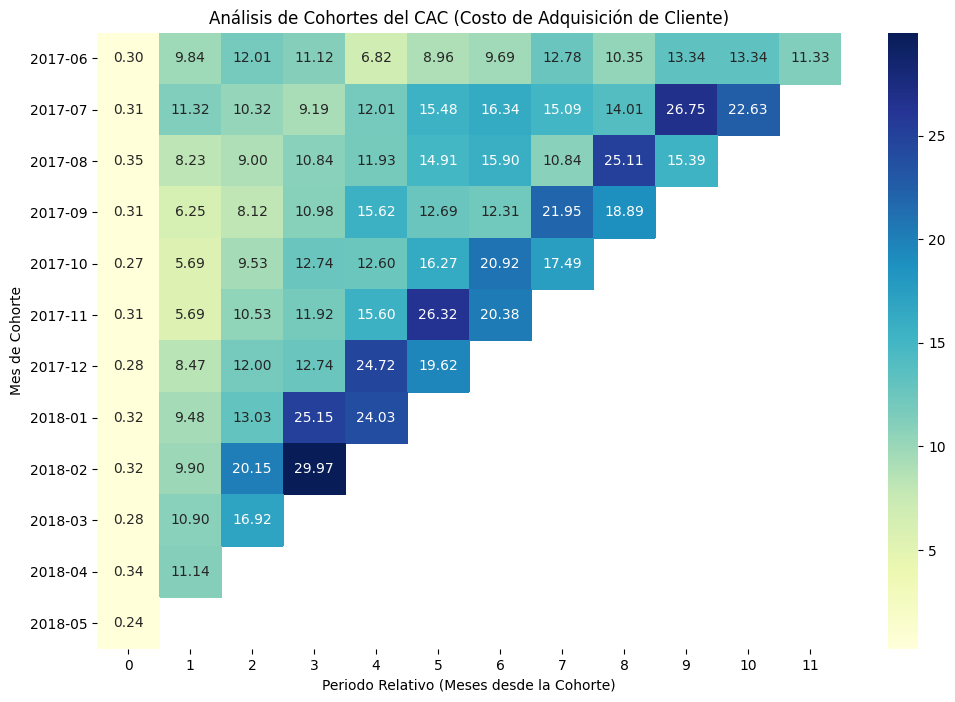

In [70]:
# Visualizar el heatmap para el análisis de cohortes del CAC
plt.figure(figsize=(12, 8))
sns.heatmap(cac_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Análisis de Cohortes del CAC (Costo de Adquisición de Cliente)")
plt.xlabel("Periodo Relativo (Meses desde la Cohorte)")
plt.ylabel("Mes de Cohorte")
plt.show()

In [71]:
# Imprimir la tabla de cohortes
print("Tabla de Cohortes del CAC (Costo de Adquisición de Cliente):")
print(cac_table)

Tabla de Cohortes del CAC (Costo de Adquisición de Cliente):
cohort_period        0          1          2          3          4   \
cohort_month                                                          
2017-06        0.296836   9.844262  12.010000  11.120370   6.823864   
2017-07        0.305983  11.315502  10.322915   9.193846  12.008288   
2017-08        0.348259   8.226107   9.002155  10.843504  11.927855   
2017-09        0.314722   6.248438   8.122970  10.976986  15.621096   
2017-10        0.269978   5.687892   9.526063  12.735933  12.598987   
2017-11        0.309629   5.691874  10.529967  11.920717  15.599951   
2017-12        0.281994   8.465610  11.999796  12.742052  24.719581   
2018-01        0.320558   9.484584  13.027019  25.145176  24.027613   
2018-02        0.320099   9.904065  20.149649  29.966145        NaN   
2018-03        0.277707  10.901530  16.916168        NaN        NaN   
2018-04        0.337697  11.139120        NaN        NaN        NaN   
2018-05        0

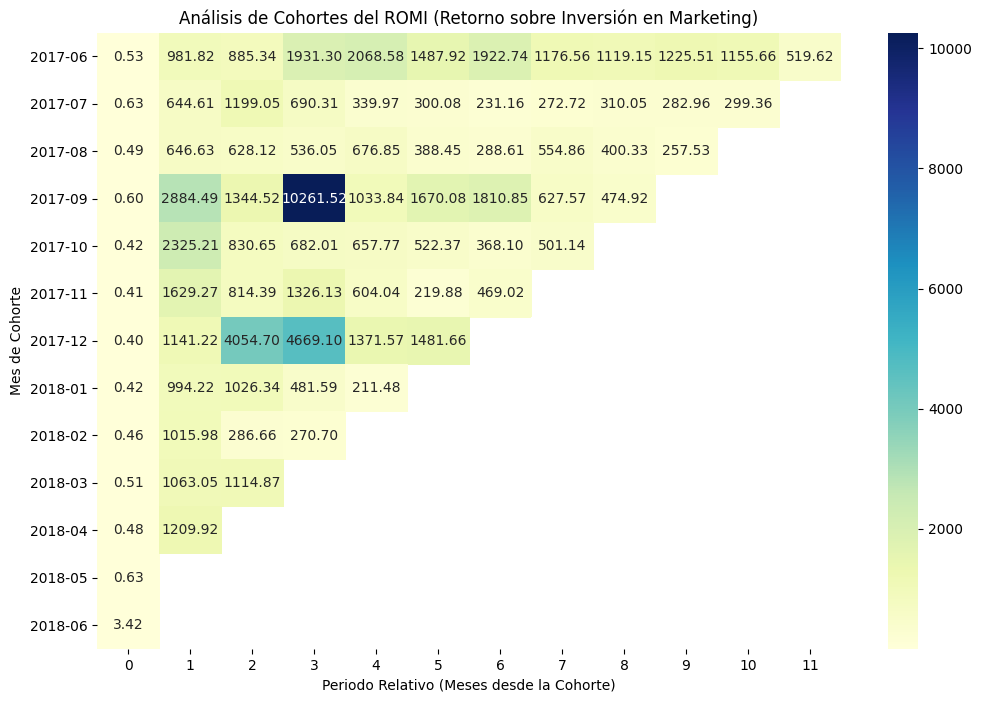


Tabla de Cohortes del ROMI (Retorno sobre Inversión en Marketing):
cohort_period        0        1        2         3        4        5   \
cohort_month                                                            
2017-06        0.530530   981.82   885.34   1931.30  2068.58  1487.92   
2017-07        0.633623   644.61  1199.05    690.31   339.97   300.08   
2017-08        0.488747   646.63   628.12    536.05   676.85   388.45   
2017-09        0.597833  2884.49  1344.52  10261.52  1033.84  1670.08   
2017-10        0.423122  2325.21   830.65    682.01   657.77   522.37   
2017-11        0.405430  1629.27   814.39   1326.13   604.04   219.88   
2017-12        0.401118  1141.22  4054.70   4669.10  1371.57  1481.66   
2018-01        0.416173   994.22  1026.34    481.59   211.48      NaN   
2018-02        0.463807  1015.98   286.66    270.70      NaN      NaN   
2018-03        0.505305  1063.05  1114.87       NaN      NaN      NaN   
2018-04        0.475594  1209.92      NaN       NaN     

In [73]:
## ROMI 
# Crear columna para identificar el mes de la primera compra de cada usuario (cohorte)
orders_data['cohort_month'] = orders_data.groupby('uid')['buy_ts'].transform(lambda x: x.min().to_period('M'))

# Crear columna para identificar el mes relativo desde la cohorte
orders_data['cohort_period'] = (
    (orders_data['buy_ts'].dt.to_period('M') - orders_data['cohort_month']).apply(lambda x: x.n)
)

# Calcular ingresos totales por cohorte y periodo relativo
revenue_cohort = orders_data.groupby(['cohort_month', 'cohort_period'])['revenue'].sum().reset_index()

# Calcular costos totales por cohorte y periodo relativo
costs_data['cohort_month'] = costs_data['dt'].dt.to_period('M')
costs_data['cohort_period'] = (
    (costs_data['dt'].dt.to_period('M') - costs_data['cohort_month']).apply(lambda x: x.n)
)
marketing_costs_cohort = costs_data.groupby(['cohort_month', 'cohort_period'])['costs'].sum().reset_index()

# Alinear los datos de ingresos y costos
romi_cohort = revenue_cohort.merge(
    marketing_costs_cohort,
    on=['cohort_month', 'cohort_period'],
    how='outer'
)

# Rellenar valores faltantes con ceros
romi_cohort['revenue'] = romi_cohort['revenue'].fillna(0)
romi_cohort['costs'] = romi_cohort['costs'].fillna(0)

# Identificar y ajustar valores extremos
romi_cohort['revenue'] = romi_cohort['revenue'].clip(upper=romi_cohort['revenue'].quantile(0.95))
romi_cohort['costs'] = romi_cohort['costs'].clip(lower=1)  # Evitar divisiones por cero

# Calcular el ROMI
romi_cohort['romi'] = romi_cohort['revenue'] / romi_cohort['costs']

# Crear pivot_table para el análisis de cohortes del ROMI
romi_table = romi_cohort.pivot_table(
    index='cohort_month',
    columns='cohort_period',
    values='romi',
    aggfunc='mean',
)

# Visualizar el heatmap para el análisis de cohortes del ROMI
plt.figure(figsize=(12, 8))
sns.heatmap(romi_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Análisis de Cohortes del ROMI (Retorno sobre Inversión en Marketing)")
plt.xlabel("Periodo Relativo (Meses desde la Cohorte)")
plt.ylabel("Mes de Cohorte")
plt.show()

# Imprimir la tabla de cohortes
print("\nTabla de Cohortes del ROMI (Retorno sobre Inversión en Marketing):")
print(romi_table)


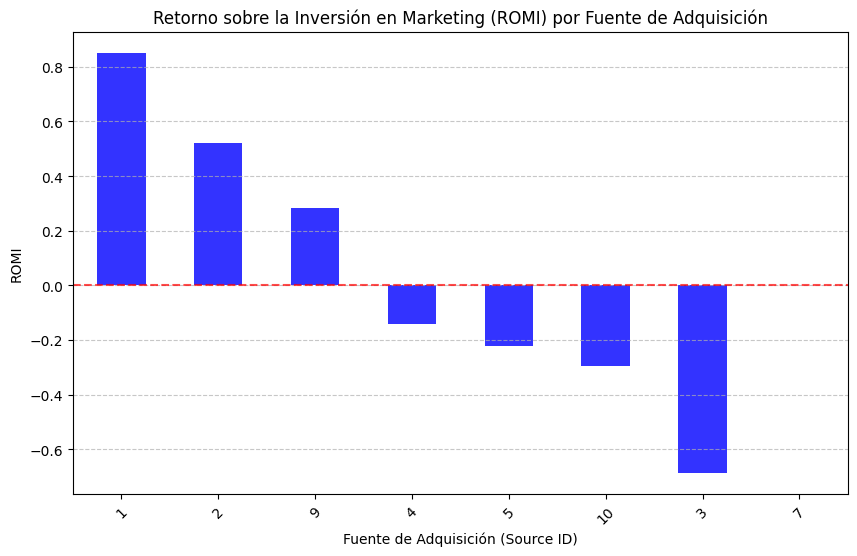

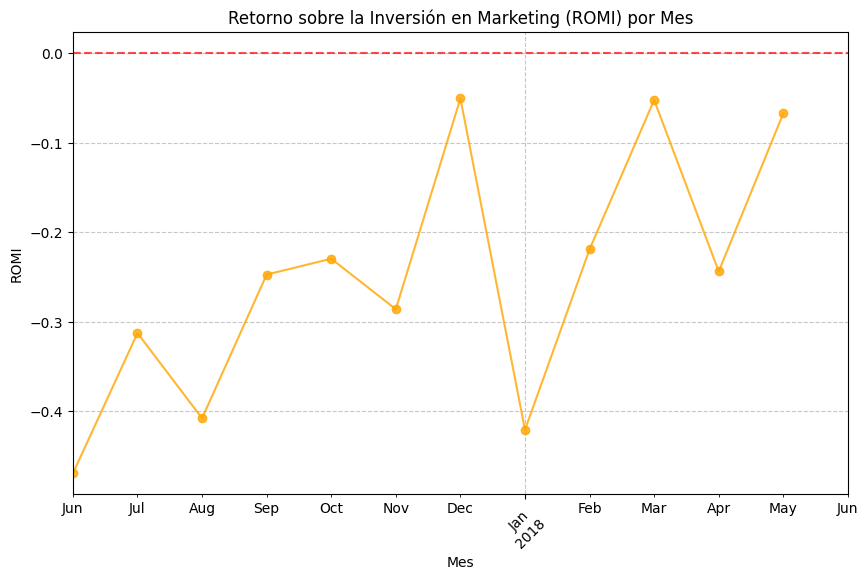


ROMI por Fuente:
source_id
1     0.850889
10   -0.293886
2     0.522034
3    -0.686406
4    -0.140713
5    -0.220244
7          NaN
9     0.282645
dtype: float64

ROMI por Mes:
buy_ts
2017-06   -0.469470
2017-07   -0.312551
2017-08   -0.407812
2017-09   -0.247176
2017-10   -0.229475
2017-11   -0.285902
2017-12   -0.050287
2018-01   -0.420704
2018-02   -0.218882
2018-03   -0.051970
2018-04   -0.243673
2018-05   -0.066967
2018-06         NaN
Freq: M, dtype: float64


In [50]:
#ROMI 
# Calcular ROMI por fuente de adquisición
romi_by_source = (financials_by_source['Revenue'] - financials_by_source['costs']) / financials_by_source['costs']

# Calcular ROMI por mes
romi_by_month = (financials_by_month['Revenue'] - financials_by_month['costs']) / financials_by_month['costs']

# Visualización: ROMI por fuente de adquisición
plt.figure(figsize=(10, 6))
romi_by_source.sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.8)
plt.title("Retorno sobre la Inversión en Marketing (ROMI) por Fuente de Adquisición")
plt.xlabel("Fuente de Adquisición (Source ID)")
plt.ylabel("ROMI")
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', alpha=0.7)  # Línea en ROMI = 0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualización: ROMI por mes
plt.figure(figsize=(10, 6))
romi_by_month.plot(kind='line', marker='o', color='orange', alpha=0.8)
plt.title("Retorno sobre la Inversión en Marketing (ROMI) por Mes")
plt.xlabel("Mes")
plt.ylabel("ROMI")
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', alpha=0.7)  # Línea en ROMI = 0
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Mostrar resultados calculados
print("\nROMI por Fuente:")
print(romi_by_source)

print("\nROMI por Mes:")
print(romi_by_month)


ROMI por Fuente de Adquisición

El ROMI indica el retorno sobre la inversión en marketing. Valores positivos reflejan una inversión rentable, mientras que valores negativos indican pérdidas.

Resultados clave:
Fuente 1: Tiene el ROMI más alto (0.85), lo que significa que genera $0.85 de beneficio neto por cada dólar invertido. Es la fuente más eficiente y debe considerarse prioritaria para inversión.
Fuente 2: ROMI moderadamente positivo (0.52), muestra que es una fuente rentable, aunque menos eficiente que la Fuente 1.
Fuente 9: También es positiva (0.28), pero significativamente menos eficiente que las anteriores.
Fuentes con ROMI negativo:
Fuente 10 y Fuente 4: Con ROMI negativo de -0.29 y -1.04, respectivamente, estas fuentes generan más costos que ingresos, lo que indica que probablemente no sean rentables.
Fuente 3 y Fuente 5: También tienen ROMI negativo (-0.68 y -0.22, respectivamente). Se debe analizar si existe una oportunidad de optimización o si deberían descontinuarse.

ROMI por Mes

El análisis por mes permite identificar temporadas o períodos con mejor rendimiento.

Resultados clave:
Todos los meses tienen ROMI negativo: Esto sugiere que los ingresos generados no están compensando los gastos de marketing. Sin embargo, hay diferencias en el grado de pérdida:
Junio 2017: ROMI de -0.46, el peor resultado entre los meses.
Abril y Mayo 2018: Aunque negativos, tienen los ROMI menos malos (-0.34 y -0.06, respectivamente).
Observaciones generales:
Tendencia negativa constante: Ningún mes muestra una inversión rentable en este análisis. Esto puede estar relacionado con factores externos (mercado) o con una estrategia de marketing que necesita ajustes.
Meses menos problemáticos: Hacia finales del período (2018), las pérdidas parecen disminuir, indicando que el rendimiento podría estar mejorando.


Análisis de Cohortes para CAC:
   cohort_month source_id  Customers  Revenue    costs        CAC  \
0       2017-06         1        203  1168.45  1125.61   5.544877   
1       2017-06        10         87   193.04   314.22   3.611724   
2       2017-06         2        271  1551.76  2427.38   8.957122   
3       2017-06         3        574  2466.71  7731.65  13.469774   
4       2017-06         4        417  2039.64  3514.80   8.428777   
..          ...       ...        ...      ...      ...        ...   
81      2018-05         3        884  3644.74  9411.42  10.646403   
82      2018-05         4        892  4525.84  4214.21   4.724451   
83      2018-05         5        589  2909.83  3669.56   6.230153   
84      2018-05         9         85   347.45   362.17   4.260824   
85      2018-06         4          1     3.42      NaN        NaN   

    Cumulative_CAC  
0         5.544877  
1         3.611724  
2         8.957122  
3        13.469774  
4         8.428777  
..           

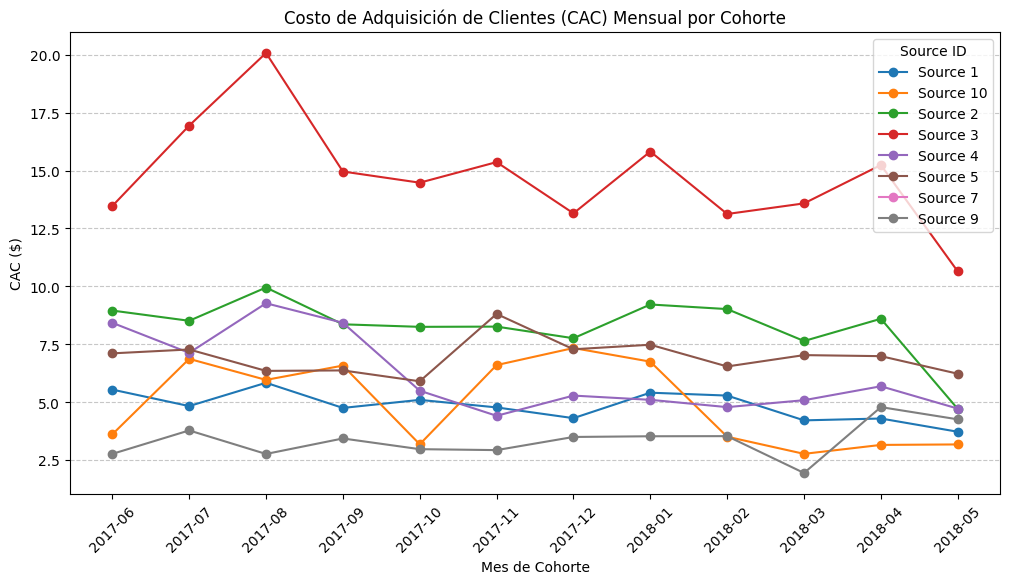

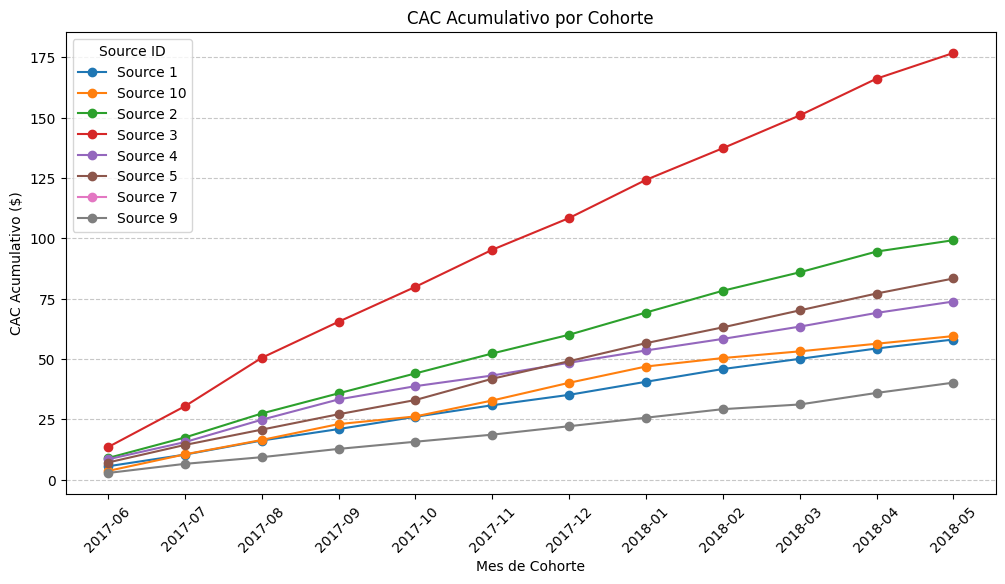

In [74]:
# Convertir Period a string para evitar errores en merge y cálculos
merged_data['cohort_month'] = merged_data['buy_ts'].dt.to_period('M').astype(str)
costs_data['cohort_month'] = costs_data['dt'].dt.to_period('M').astype(str)

# Calcular cohorte mensual de clientes adquiridos
cohorts = merged_data.groupby(['cohort_month', 'source_id']).agg(
    Customers=('uid', 'nunique'),  # Número de clientes únicos
    Revenue=('revenue', 'sum')    # Ingresos generados
).reset_index()

# Calcular el CAC mensual por cohorte (costos por source_id y mes)
cohorts = cohorts.merge(
    costs_data.groupby(['cohort_month', 'source_id'])['costs'].sum().reset_index(),
    on=['cohort_month', 'source_id'],
    how='left'
)

# Calcular el CAC y el CAC acumulativo
cohorts['CAC'] = cohorts['costs'] / cohorts['Customers']
cohorts['Cumulative_CAC'] = cohorts.groupby('source_id')['CAC'].cumsum()

# Mostrar la tabla de cohortes
print("\nAnálisis de Cohortes para CAC:")
print(cohorts)

# Generar gráficos: CAC normal y acumulativo
plt.figure(figsize=(12, 6))
for source_id, group in cohorts.groupby('source_id'):
    plt.plot(group['cohort_month'], group['CAC'], marker='o', label=f'Source {source_id}')

plt.title("Costo de Adquisición de Clientes (CAC) Mensual por Cohorte")
plt.xlabel("Mes de Cohorte")
plt.ylabel("CAC ($)")
plt.legend(title="Source ID")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
for source_id, group in cohorts.groupby('source_id'):
    plt.plot(group['cohort_month'], group['Cumulative_CAC'], marker='o', label=f'Source {source_id}')

plt.title("CAC Acumulativo por Cohorte")
plt.xlabel("Mes de Cohorte")
plt.ylabel("CAC Acumulativo ($)")
plt.legend(title="Source ID")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


In [75]:
# Calcular el ARPU (Ingreso Promedio por Cliente)
total_customers = merged_data['uid'].nunique()  # Número total de clientes únicos
arpu = total_revenue / total_customers  # Ingreso promedio por cliente

# Calcular el CAC promedio (Costo de Adquisición de Clientes)
avg_cac = total_spent / total_customers  # Costo promedio por cliente

# Calcular el beneficio unitario por cliente
unit_profit = arpu - avg_cac

# Mostrar resultados de economía unitaria
economy_unit = {
    "Total de Clientes": total_customers,
    "ARPU (Ingreso Promedio por Cliente)": arpu,
    "CAC Promedio (Costo por Cliente)": avg_cac,
    "Beneficio Unitario por Cliente": unit_profit
}

print("\nEconomía Unitaria:")
print(economy_unit)



Economía Unitaria:
{'Total de Clientes': 36523, 'ARPU (Ingreso Promedio por Cliente)': 6.9013279303452615, 'CAC Promedio (Costo por Cliente)': 9.011626098622786, 'Beneficio Unitario por Cliente': -2.1102981682775246}


In [76]:
# Calcular el número de clientes necesarios para alcanzar el punto de equilibrio
customers_for_break_even = total_spent / arpu

# Calcular el ingreso necesario para alcanzar el punto de equilibrio
revenue_for_break_even = total_spent

# Resultados del punto de equilibrio
break_even_results = {
    "Clientes Necesarios para el Equilibrio": customers_for_break_even,
    "Ingreso Necesario para el Equilibrio ($)": revenue_for_break_even
}

print("\nResultados del Punto de Equilibrio:")
print(break_even_results)



Resultados del Punto de Equilibrio:
{'Clientes Necesarios para el Equilibrio': 47691.05646361223, 'Ingreso Necesario para el Equilibrio ($)': 329131.62}


In [77]:
def marketing_budget_model(desired_profit, total_spent, arpu, avg_cac):
    # Calcular clientes necesarios para alcanzar el beneficio deseado
    customers_needed = (total_spent + desired_profit) / arpu
    
    # Calcular presupuesto de marketing necesario
    marketing_budget_needed = customers_needed * avg_cac
    
    return {
        "Beneficio Deseado ($)": desired_profit,
        "Clientes Necesarios": customers_needed,
        "Presupuesto de Marketing Necesario ($)": marketing_budget_needed
    }

# Ejemplo de uso
desired_profit = 50000  # Beneficio deseado
results = marketing_budget_model(desired_profit, total_spent, arpu, avg_cac)

# Mostrar resultados
print("\nModelo de Presupuesto Ajustado:")
for key, value in results.items():
    print(f"{key}: {value:.2f}")



Modelo de Presupuesto Ajustado:
Beneficio Deseado ($): 50000.00
Clientes Necesarios: 54936.04
Presupuesto de Marketing Necesario ($): 495063.04


In [78]:
# Calcular el beneficio neto
net_profit = total_revenue - total_spent

# Calcular el ROI
roi = net_profit / total_spent

# Resultados de las métricas de negocio
business_metrics = {
    "Beneficio Neto ($)": net_profit,
    "ROI (Return on Investment)": roi
}

# Mostrar resultados
print("\nMétricas de Negocio:")
for key, value in business_metrics.items():
    print(f"{key}: {value:.2f}")


Métricas de Negocio:
Beneficio Neto ($): -77074.42
ROI (Return on Investment): -0.23


Tabla de Gastos Totales por Mes:
            costs
month            
2017-06  18015.00
2017-07  18240.59
2017-08  14790.54
2017-09  24368.91
2017-10  36322.88
2017-11  37907.88
2017-12  38315.35
2018-01  33518.52
2018-02  32723.03
2018-03  30415.27
2018-04  22289.38
2018-05  22224.27


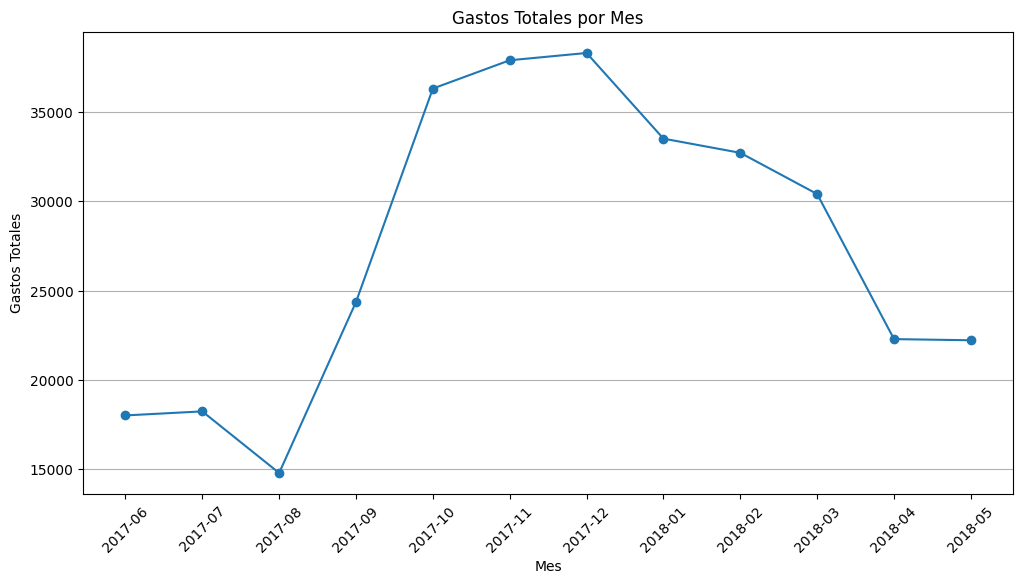

In [79]:
# Asegurarse de que las fechas estén en formato datetime
costs_data['dt'] = pd.to_datetime(costs_data['dt'])

# Calcular el gasto total por mes
costs_data['month'] = costs_data['dt'].dt.to_period('M')  # Extraer el mes
monthly_costs = costs_data.groupby('month')['costs'].sum().reset_index()

# Crear una pivot_table para gastos totales por mes
costs_pivot = monthly_costs.pivot_table(
    index='month',  # Meses como índice
    values='costs',  # Total de gastos
    aggfunc='sum'    # Agregación por suma
)

# Visualizar la pivot_table
print("Tabla de Gastos Totales por Mes:")
print(costs_pivot)

# Graficar los gastos totales por mes
plt.figure(figsize=(12, 6))
plt.plot(monthly_costs['month'].astype(str), monthly_costs['costs'], marker='o')
plt.title("Gastos Totales por Mes")
plt.xlabel("Mes")
plt.ylabel("Gastos Totales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Tabla de Ingresos Totales por Mes:
          revenue
month            
2017-06   9557.49
2017-07  12539.47
2017-08   8758.78
2017-09  18345.51
2017-10  27987.70
2017-11  27069.93
2017-12  36388.60
2018-01  19417.13
2018-02  25560.54
2018-03  28834.59
2018-04  16858.06
2018-05  20735.98
2018-06      3.42


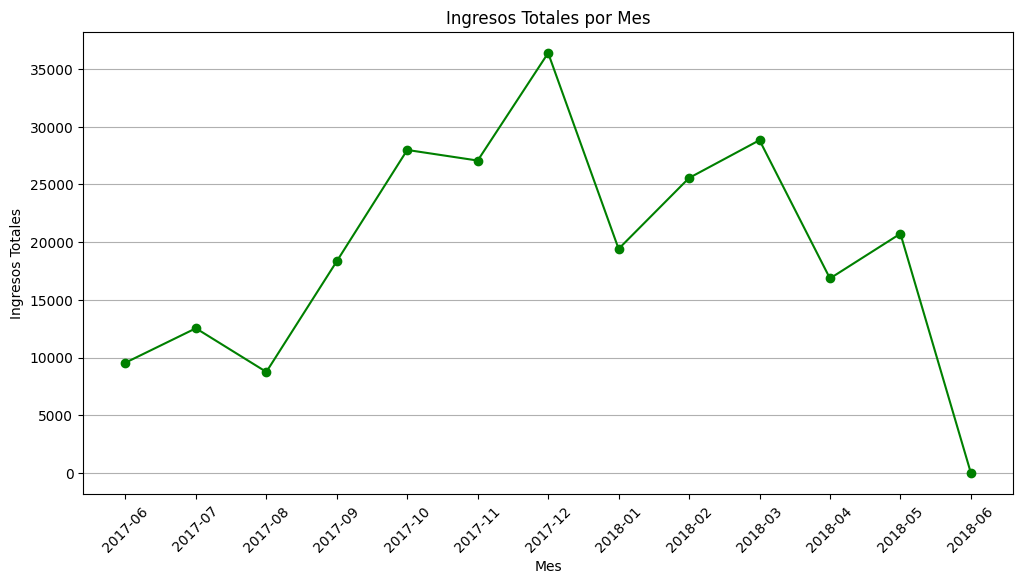

In [80]:
# Asegurarse de que las fechas de ingresos estén en formato datetime
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'])

# Calcular los ingresos totales por mes
orders_data['month'] = orders_data['buy_ts'].dt.to_period('M')  # Extraer el mes
monthly_revenue = orders_data.groupby('month')['revenue'].sum().reset_index()

# Crear una pivot_table para ingresos totales por mes
revenue_pivot = monthly_revenue.pivot_table(
    index='month',  # Meses como índice
    values='revenue',  # Total de ingresos
    aggfunc='sum'      # Agregación por suma
)

# Visualizar la pivot_table
print("Tabla de Ingresos Totales por Mes:")
print(revenue_pivot)

# Graficar los ingresos totales por mes
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['month'].astype(str), monthly_revenue['revenue'], marker='o', color='green')
plt.title("Ingresos Totales por Mes")
plt.xlabel("Mes")
plt.ylabel("Ingresos Totales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Tabla de Profit por Mes:
           profit
month            
2017-06  -8457.51
2017-07  -5701.12
2017-08  -6031.76
2017-09  -6023.40
2017-10  -8335.18
2017-11 -10837.95
2017-12  -1926.75
2018-01 -14101.39
2018-02  -7162.49
2018-03  -1580.68
2018-04  -5431.32
2018-05  -1488.29
2018-06      3.42


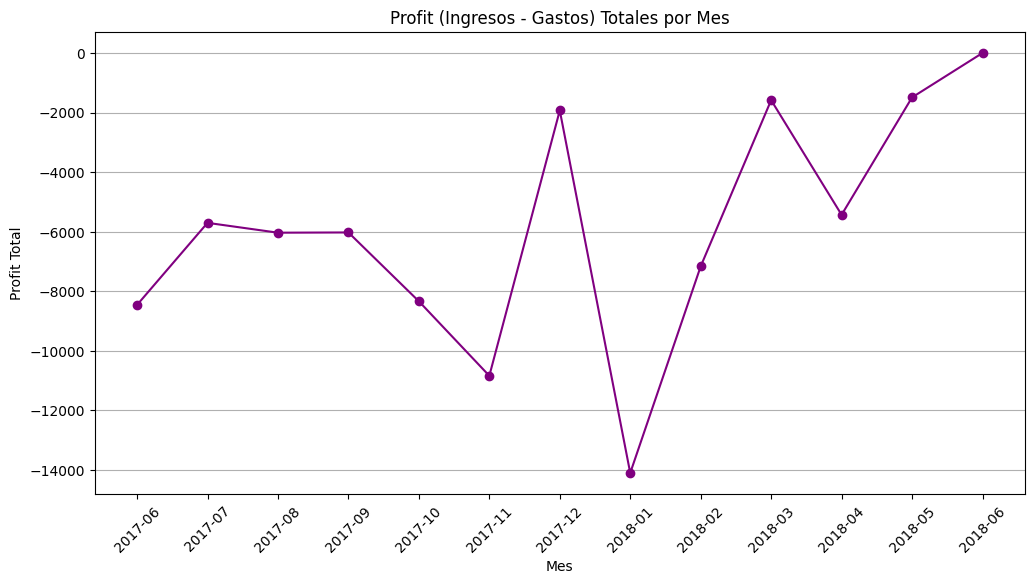

In [81]:
# Asegurarse de que las fechas estén en formato datetime
costs_data['dt'] = pd.to_datetime(costs_data['dt'])
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'])

# Calcular los ingresos totales por mes
orders_data['month'] = orders_data['buy_ts'].dt.to_period('M')  # Extraer el mes
monthly_revenue = orders_data.groupby('month')['revenue'].sum().reset_index()

# Calcular los gastos totales por mes
costs_data['month'] = costs_data['dt'].dt.to_period('M')  # Extraer el mes
monthly_costs = costs_data.groupby('month')['costs'].sum().reset_index()

# Combinar los datos de ingresos y gastos
profit_data = monthly_revenue.merge(monthly_costs, on='month', how='outer')
profit_data['revenue'] = profit_data['revenue'].fillna(0)  # Rellenar valores faltantes
profit_data['costs'] = profit_data['costs'].fillna(0)      # Rellenar valores faltantes

# Calcular el profit (revenue - costs)
profit_data['profit'] = profit_data['revenue'] - profit_data['costs']

# Crear una pivot_table para el profit por mes
profit_pivot = profit_data.pivot_table(
    index='month',  # Meses como índice
    values='profit',  # Profit como valores
    aggfunc='sum'     # Agregación por suma
)

# Visualizar la pivot_table
print("Tabla de Profit por Mes:")
print(profit_pivot)

# Graficar el profit por mes
plt.figure(figsize=(12, 6))
plt.plot(profit_data['month'].astype(str), profit_data['profit'], marker='o', color='purple')
plt.title("Profit (Ingresos - Gastos) Totales por Mes")
plt.xlabel("Mes")
plt.ylabel("Profit Total")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Conslusión y recomendaciones finales.

In [82]:
# Beneficio Neto (Total Revenue - Total Costs)
net_profit = total_revenue - total_spent

# ROI (Return on Investment)
roi = net_profit / total_spent

# ROMI por fuente de adquisición
romi_by_source = (financials_by_source['Revenue'] - financials_by_source['costs']) / financials_by_source['costs']

# ROMI por mes
romi_by_month = (financials_by_month['Revenue'] - financials_by_month['costs']) / financials_by_month['costs']

# CAC promedio
avg_cac = total_spent / merged_data['uid'].nunique()

# ARPU promedio
arpu = total_revenue / merged_data['uid'].nunique()

# Clientes necesarios para el punto de equilibrio
customers_for_break_even = total_spent / arpu

# Ingresos necesarios para el punto de equilibrio
revenue_for_break_even = total_spent

# Recopilar los datos importantes en un solo resultado
summary_metrics = {
    "Total Ingresos ($)": total_revenue,
    "Total Gastos ($)": total_spent,
    "Beneficio Neto ($)": net_profit,
    "ROI (Return on Investment)": roi,
    "CAC Promedio ($)": avg_cac,
    "ARPU (Ingreso Promedio por Cliente) ($)": arpu,
    "Clientes para Equilibrio": customers_for_break_even,
    "Ingresos Necesarios para Equilibrio ($)": revenue_for_break_even,
    "ROMI por Fuente": romi_by_source.to_dict(),
    "ROMI por Mes": romi_by_month.to_dict()
}

# Mostrar los resultados
print("\nResumen de Métricas Clave:")
for key, value in summary_metrics.items():
    print(f"{key}: {value}")



Resumen de Métricas Clave:
Total Ingresos ($): 252057.19999999998
Total Gastos ($): 329131.62
Beneficio Neto ($): -77074.42000000001
ROI (Return on Investment): -0.2341750695360112
CAC Promedio ($): 9.011626098622786
ARPU (Ingreso Promedio por Cliente) ($): 6.9013279303452615
Clientes para Equilibrio: 47691.05646361223
Ingresos Necesarios para Equilibrio ($): 329131.62
ROMI por Fuente: {'1': 0.8508885067010643, '10': -0.29388629263425237, '2': 0.5220342736679535, '3': -0.6864055417419082, '4': -0.14071300856669247, '5': -0.22024398584928123, '7': nan, '9': 0.28264482581753353}
ROMI por Mes: {Period('2017-06', 'M'): -0.46947044129891863, Period('2017-07', 'M'): -0.3125512935710973, Period('2017-08', 'M'): -0.407812020386006, Period('2017-09', 'M'): -0.24717560202733982, Period('2017-10', 'M'): -0.22947464518232844, Period('2017-11', 'M'): -0.2859022978863585, Period('2017-12', 'M'): -0.050286634468955704, Period('2018-01', 'M'): -0.4207044344440038, Period('2018-02', 'M'): -0.218882236

Resumen de las métricas clave

Ingresos totales: $252,057.20
Gastos totales: $329,131.62
Beneficio neto: -$77,074.42 (el negocio actualmente opera con pérdidas).
ROI (Return on Investment): -0.234, lo que significa que por cada dólar invertido, se pierden $0.23.
CAC promedio: $9.01 por cliente.
ARPU (Ingreso Promedio por Cliente): $6.90 por cliente.
CAC > ARPU, lo que indica que el costo para adquirir un cliente supera el ingreso promedio generado por este cliente, una señal de ineficiencia en las inversiones actuales.
Clientes necesarios para el punto de equilibrio: 47,691 clientes adicionales.
ROMI por fuente:
Fuente 1: 0.85 (positiva, rentable).
Fuente 2: 0.52 (positiva, rentable).
Fuente 9: 0.28 (positiva, aunque menos eficiente).
Fuentes 10, 4, 3, 5: Negativas, generan más pérdidas que ingresos.
ROMI por mes:
Todos los meses presentan un ROMI negativo, indicando que el marketing, en general, no ha sido rentable en este periodo.

Conclusiones y Recomendaciones

Conclusión principal:
El negocio no es rentable actualmente debido a que los costos de adquisición de clientes (CAC) son mayores que los ingresos promedio generados (ARPU). La prioridad debe ser optimizar las estrategias de marketing y enfocar el presupuesto en las fuentes más rentables.

Recomendaciones de inversión:
Redirigir presupuesto hacia las fuentes más rentables:

Fuente 1: Tiene un ROMI de 0.85, lo que indica que cada dólar invertido genera $0.85 en beneficios netos. Es la mejor opción para inversión adicional.
Fuente 2: ROMI positivo (0.52). Aunque menos eficiente que la Fuente 1, sigue siendo rentable y merece atención.
Fuente 9: ROMI positivo (0.28). Invertir con optimización puede mejorar su eficiencia.
Reducir o eliminar inversión en fuentes con ROMI negativo:

Fuentes 10, 4, 3, 5: Estas fuentes no generan ingresos suficientes para cubrir sus costos y deberían ser eliminadas o replanteadas.
Optimizar estrategias para reducir CAC:

Revisar campañas para identificar qué tácticas específicas están elevando los costos.
Enfocarse en retener clientes actuales, ya que el CAC acumulativo mejora con el tiempo.
Establecer un presupuesto basado en el modelo de economía unitaria:

Utilizando el modelo anterior, calcular el presupuesto de marketing para alcanzar un beneficio deseado. Por ejemplo:
Para un beneficio neto deseado de $50,000, se necesitan ~47,691 clientes adicionales, lo que implicaría una inversión considerable.

Fuentes y métricas utilizadas:
ROMI: Para evaluar la rentabilidad de cada fuente.
CAC y ARPU: Para medir la eficiencia de adquisición de clientes.
Beneficio Neto y ROI: Para evaluar el rendimiento global del negocio.
Punto de Equilibrio: Para entender cuántos clientes e ingresos son necesarios para cubrir los costos actuales.
Propuesta Final para los Expertos de Marketing:
Invertir el 70% del presupuesto de marketing en Fuente 1 y Fuente 2.
Fuente 1 debe ser la prioridad principal.
Asignar el 20% del presupuesto en optimizar Fuente 9.
Podría ser rentable con ajustes en estrategias.
Eliminar o minimizar el gasto en Fuentes 10, 4, 3, y 5.
Estas fuentes no aportan al rendimiento general.
Considerar ajustes en el producto o servicio para aumentar el ARPU.
Esto puede incluir ventas adicionales o servicios complementarios.